Telco Churn Case study - Dhruv Kartikey & Shashank Verma

In [1]:
#Let's first import the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Step 1: read the data set
telco_df = pd.read_csv('./telecom_churn_data.csv')

In [3]:
telco_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
#Rounding of numerics to places
round(100*(telco_df.isnull().sum()/len(telco_df.index)), 2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_user_6        74.85
night_pck_

In [6]:
## Preparing the churn data
# This is minus 70th percentile
telco_df1 = telco_df
telco_df1['total_rech_amt_good_phase'] = (telco_df1['total_rech_amt_6'] + telco_df1['total_rech_amt_7'])/2
telco_df1 = telco_df1[telco_df1['total_rech_amt_good_phase'] > telco_df1['total_rech_amt_good_phase'].quantile(0.70)]

In [7]:
telco_df1['total_usage_col'] = telco_df1['total_og_mou_9'] + telco_df1['total_ic_mou_9'] + telco_df1['vol_2g_mb_9'] + telco_df1['vol_3g_mb_9']

In [8]:
telco_df1['churn'] = np.where(telco_df1['total_usage_col']== 0, 1, 0)
telco_df1['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

In [9]:
telco_df1 = telco_df1.drop(['total_rech_amt_good_phase','total_usage_col'],1)

In [10]:
## Dropping variable for 9 months

In [11]:
n_col = [col for col in telco_df1.columns if '_9' in col]
print(telco_df1.shape)


(29979, 227)


In [12]:
telco_df1 = telco_df1.drop(n_col, axis = 1)
print(telco_df1.shape)
telco_df1 = telco_df1.drop('sep_vbc_3g', axis=1)

(29979, 173)


In [13]:
## Now we should calculate the churn rate

In [14]:
z = telco_df1['churn']

In [15]:
churn = (sum(z)/len(z.index))*100

In [16]:
print(churn)

8.636045231662164


In [17]:
telco_df1.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,2.997900e+04,29979.0,29865.0,29865.0,29865.0,29979.000000,29979.000000,29979.000000,29663.000000,29676.000000,...,29979.000000,29979.000000,11387.000000,11652.000000,11741.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,109.0,0.0,0.0,0.0,587.587624,589.424681,535.067748,299.392147,307.701888,...,0.150339,0.140498,0.897603,0.889804,0.837322,1264.158911,129.482436,135.225368,121.450911,0.08636
std,6.846594e+05,0.0,0.0,0.0,0.0,442.848876,463.049067,492.447887,462.369385,483.432401,...,0.969779,0.975212,0.303184,0.313147,0.369087,975.181038,390.625027,408.218570,389.910814,0.28090
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.00000
25%,7.000641e+09,109.0,0.0,0.0,0.0,364.352500,365.235000,289.782000,43.030000,42.775000,...,0.000000,0.000000,1.000000,1.000000,1.000000,480.000000,0.000000,0.000000,0.000000,0.00000
50%,7.001232e+09,109.0,0.0,0.0,0.0,495.951000,493.781000,452.232000,128.480000,128.120000,...,0.000000,0.000000,1.000000,1.000000,1.000000,914.000000,0.000000,0.000000,0.000000,0.00000
75%,7.001814e+09,109.0,0.0,0.0,0.0,704.184500,700.986000,671.349500,357.655000,365.127500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1923.500000,1.600000,2.025000,0.000000,0.00000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,35.000000,41.000000,1.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,1.00000


In [18]:
round(100*(telco_df1.isnull().sum()/len(telco_df1.index)), 2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           0.38
std_og_t2o_mou           0.38
loc_ic_t2o_mou           0.38
last_date_of_month_6     0.00
last_date_of_month_7     0.10
last_date_of_month_8     0.52
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
onnet_mou_6              1.05
onnet_mou_7              1.01
onnet_mou_8              3.13
offnet_mou_6             1.05
offnet_mou_7             1.01
offnet_mou_8             3.13
roam_ic_mou_6            1.05
roam_ic_mou_7            1.01
roam_ic_mou_8            3.13
roam_og_mou_6            1.05
roam_og_mou_7            1.01
roam_og_mou_8            3.13
loc_og_t2t_mou_6         1.05
loc_og_t2t_mou_7         1.01
loc_og_t2t_mou_8         3.13
loc_og_t2m_mou_6         1.05
loc_og_t2m_mou_7         1.01
loc_og_t2m_mou_8         3.13
loc_og_t2f_mou_6         1.05
                        ...  
vol_3g_mb_8              0.00
arpu_3g_6               62.02
arpu_3g_7 

In [19]:
#Time to delete coloum with values zero or constant as they will not contribute to model
telco_df2 = telco_df1.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                     'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
                   'std_ic_t2o_mou_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], 1)

In [20]:
fields_to_be_imputed_with_2 = ['fb_user','night_pck_user','arpu_2g','arpu_3g','av_rech_amt_data','count_rech_3g',
'count_rech_2g','max_rech_data','total_rech_data','date_of_last_rech_data']

In [21]:
for field in fields_to_be_imputed_with_2:
    for month in ['6', '7', '8']:
        field_to_be_imputed_with_2 = field + '_' + month
        telco_df2 = telco_df2.drop([field_to_be_imputed_with_2], 1)

In [22]:
print(telco_df2.shape)

(29979, 129)


In [23]:
fields_to_be_imputed_with_2 = ['date_of_last_rech']

In [24]:
telco_df2['date_of_last_rech_6'] = pd.to_datetime(telco_df2.date_of_last_rech_6).dt.day

In [25]:
telco_df2['date_of_last_rech_7'] = pd.to_datetime(telco_df2.date_of_last_rech_7).dt.day

In [26]:
telco_df2['date_of_last_rech_8'] = pd.to_datetime(telco_df2.date_of_last_rech_8).dt.day

In [27]:
telco_df2.shape

(29979, 129)

In [28]:
##We can now assign the median value to the Missing observations in the set

In [29]:
missing = telco_df2.columns[telco_df2.isnull().sum()>0]
for col in missing:
    telco_df2[col].fillna((telco_df2[col].median()), inplace=True)

In [30]:
round(100*(telco_df2.isnull().sum()/len(telco_df2.index)), 2)

mobile_number          0.0
arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_mou_6           0.0
loc_og_mou_7           0.0
                      ... 
max_rech_amt_8         0.0
date_of_last_rech_6    0.0
date_of_last_rech_7    0.0
date_of_last_rech_8    0.0
last_day_rch_amt_6     0.0
last_day_rch_amt_7     0.0
l

In [31]:
telco_df2.shape

(29979, 129)

In [32]:
## Analysing and treatment for Outliers

In [33]:
telco_df3 = telco_df2

In [34]:
telco_df3.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,2.997900e+04,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,587.587624,589.424681,535.067748,297.590611,305.886840,271.137938,421.142281,426.990330,383.029940,...,0.185296,0.173321,0.138063,0.150339,0.140498,1264.158911,129.482436,135.225368,121.450911,0.08636
std,6.846594e+05,442.848876,463.049067,492.447887,460.257092,481.318377,465.205131,468.998414,485.030117,473.464516,...,0.620703,0.583178,0.875984,0.969779,0.975212,975.181038,390.625027,408.218570,389.910814,0.28090
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.00000
1%,7.000028e+09,18.221200,25.600600,0.000000,0.000000,0.000000,0.000000,1.057800,1.099000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,0.00000
10%,7.000269e+09,270.692200,274.458200,134.118600,12.230000,11.726000,6.906000,58.606000,59.604000,35.072000,...,0.000000,0.000000,0.000000,0.000000,0.000000,294.000000,0.000000,0.000000,0.000000,0.00000
25%,7.000641e+09,364.352500,365.235000,289.782000,43.590000,43.370000,34.060000,142.860000,141.280000,111.780000,...,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.00000
50%,7.001232e+09,495.951000,493.781000,452.232000,128.480000,128.120000,106.390000,285.990000,285.630000,251.530000,...,0.000000,0.000000,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.00000
75%,7.001814e+09,704.184500,700.986000,671.349500,353.500000,360.360000,298.215000,523.625000,532.905000,483.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1923.500000,1.600000,2.025000,0.000000,0.00000
90%,7.002167e+09,994.311800,996.051400,985.499200,795.354000,825.486000,724.182000,916.490000,935.716000,854.006000,...,1.000000,1.000000,0.000000,0.000000,0.000000,2846.000000,439.100000,455.078000,395.168000,0.00000


In [35]:
cols = [col for col in telco_df3.columns if col not in ['churn','mobile_number']]

In [36]:
for col in cols:
    percentiles = telco_df3[col].quantile([0.01,0.99]).values
    telco_df3[col][telco_df3[col] <= percentiles[0]] = percentiles[0]
    telco_df3[col][telco_df3[col] >= percentiles[1]] = percentiles[1]

In [37]:
telco_df3.shape

(29979, 129)

In [38]:
## New derived colum for internet usage based on median
telco_df3['int_usage_median'] = telco_df3[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].median(axis=1)


In [39]:
telco_df3['int_usage_median'] = telco_df3.int_usage_median.map(lambda x: 1 if x == 0 else 0)

In [40]:
telco_df3 = telco_df3.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'], 1)

In [41]:
telco_df3['tenure_buck'] = np.round(telco_df3['aon']/365,1)

In [42]:
bins = [0, 1, 2, 3, 4, 10]

In [43]:
telco_df3['tenure_buck'] = pd.cut(telco_df3['tenure_buck'], bins)

In [44]:
telco_df3['tenure_buck'].value_counts()

(4, 10]    9681
(1, 2]     7486
(0, 1]     5320
(2, 3]     4530
(3, 4]     2962
Name: tenure_buck, dtype: int64

In [45]:
## Analysing the correlation Matrix
corr_matrix = telco_df3.corr().abs()

In [46]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [47]:
## Dropping all correlation with are above 0.7
drop = [column for column in upper.columns if any(upper[column] > 0.7)]
drop

['onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total

In [48]:
telco_df3 = telco_df3.drop(drop, 1)

In [49]:
telco_df3.tenure_buck.dtype

CategoricalDtype(categories=[(0, 1], (1, 2], (2, 3], (3, 4], (4, 10]],
              ordered=True)

In [50]:
# Doing one hot encoding for tenure_buck
telco_df3 = pd.get_dummies(telco_df3, drop_first=True)

In [51]:
telco_df3.rename(columns={"tenure_buck_(1, 2]": "tenure_buck_1_to_2","tenure_buck_(2, 3]":"tenure_buck_2_to_3",
                   "tenure_buck_(3, 4]":"tenure_buck_3_to_4",
                   "tenure_buck_(4, 10]":"tenure_buck_4_to_10"}, inplace=True)

In [52]:
telco_df3.shape

(29979, 72)

In [53]:
## Drop the values which have zero to no variance

In [54]:
telco_df4 = telco_df3.drop(['og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','aon'], 1)

In [55]:
telco_df4.shape

(29979, 66)

In [56]:
############### Start of Exploratory Data Analysis #################

In [57]:
cols = [col for col in telco_df4.columns if col not in ['churn','mobile_number']]

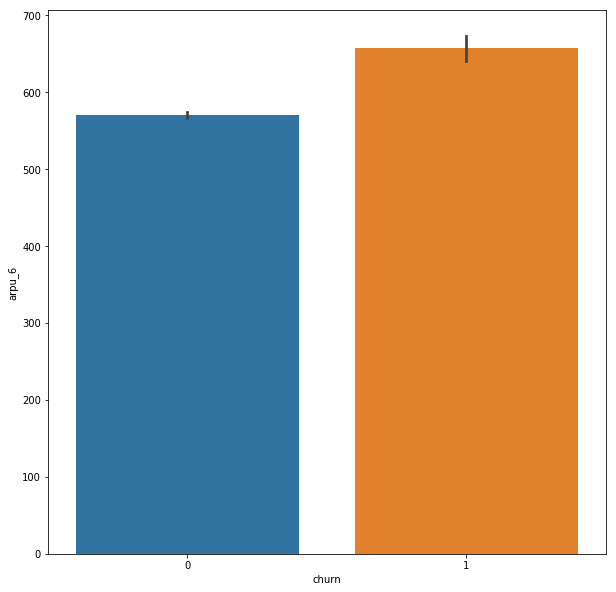

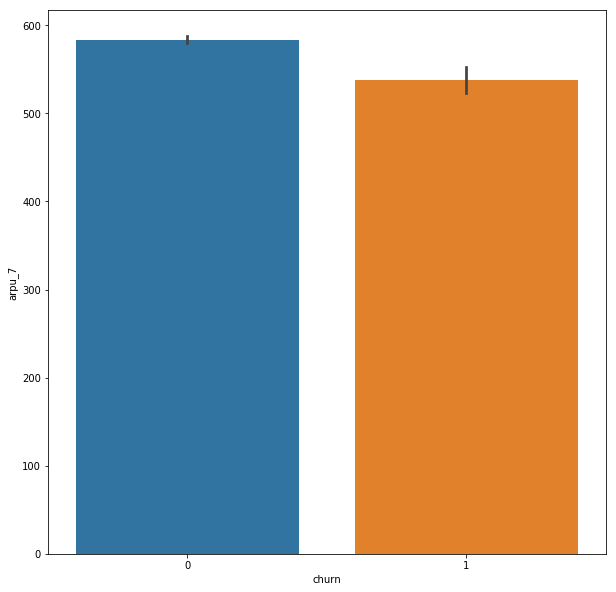

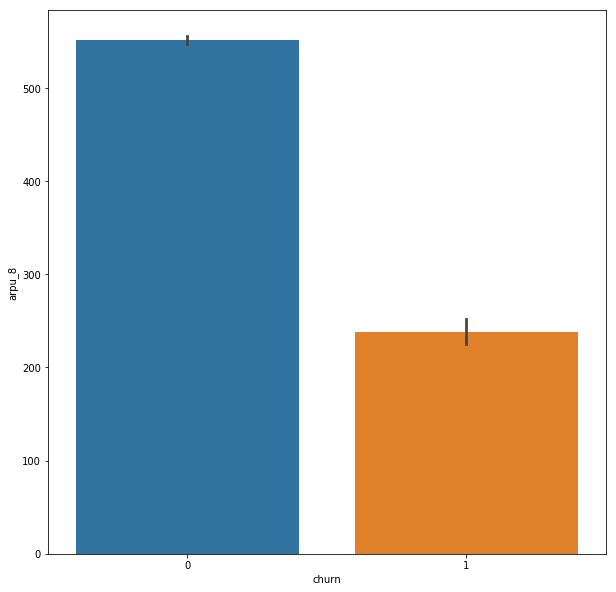

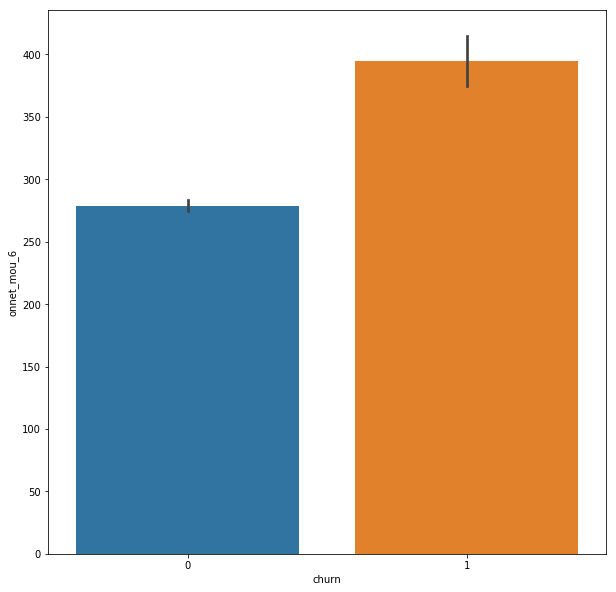

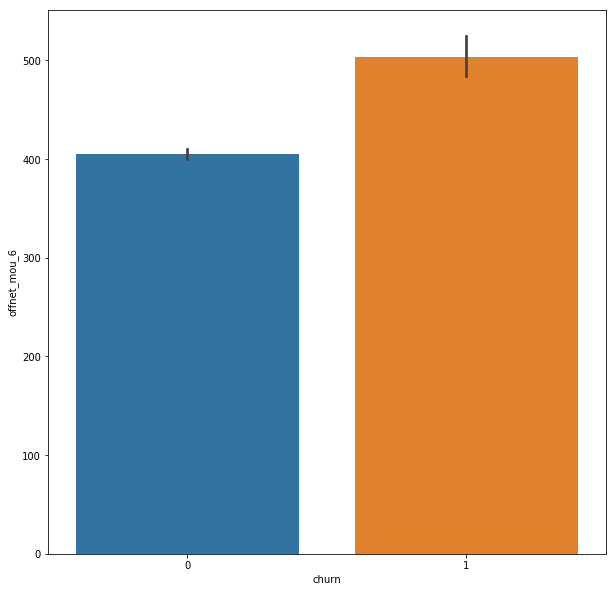

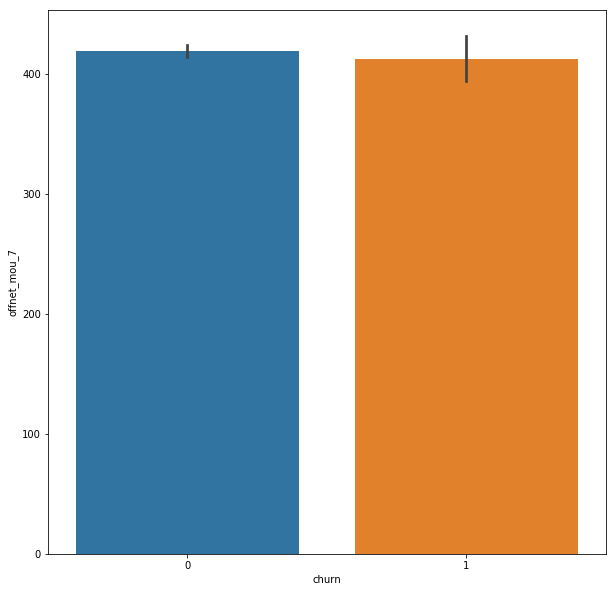

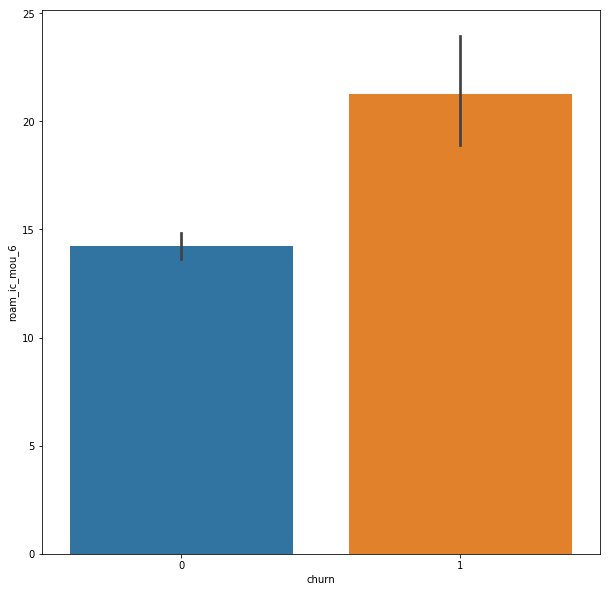

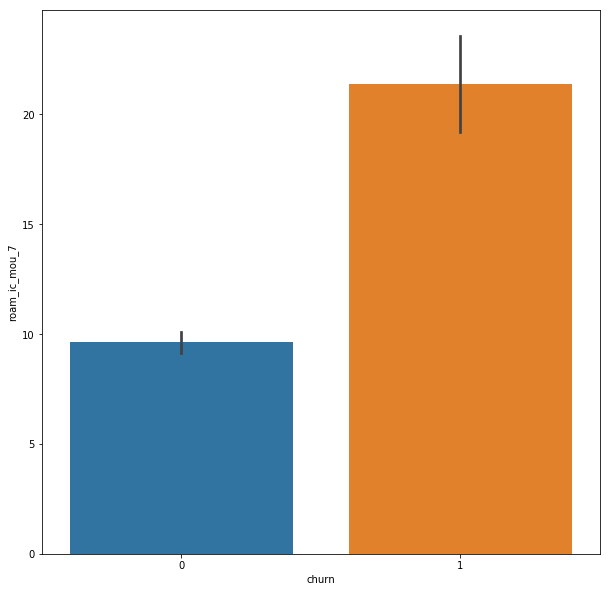

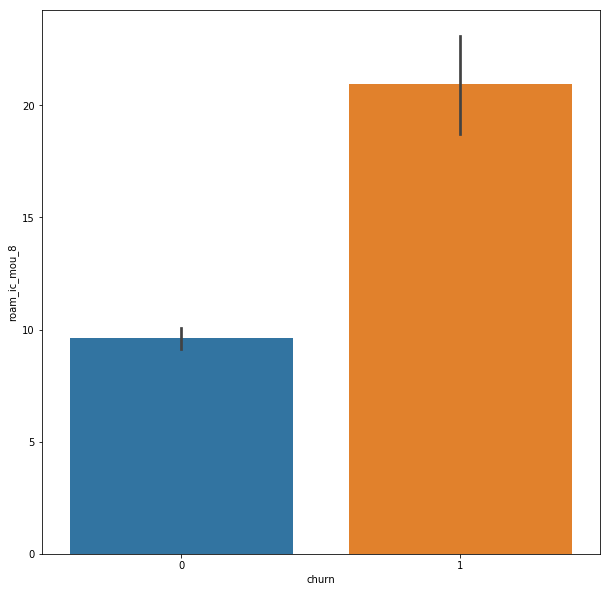

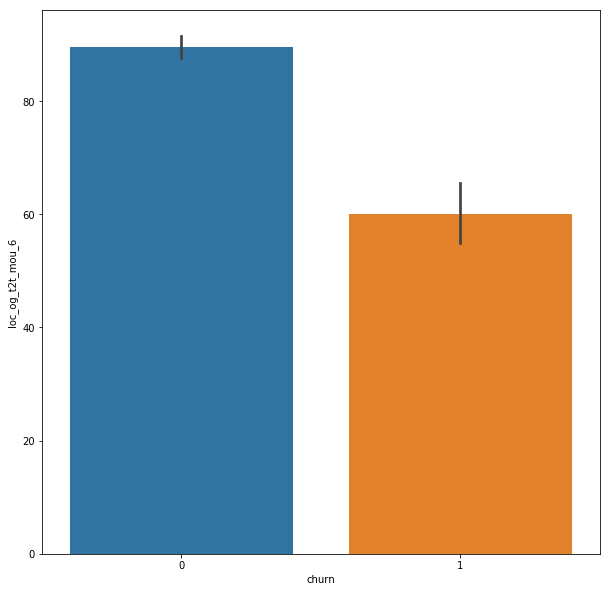

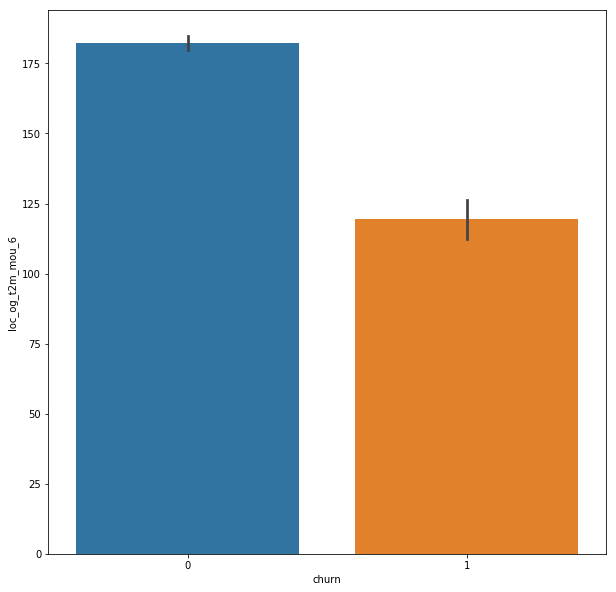

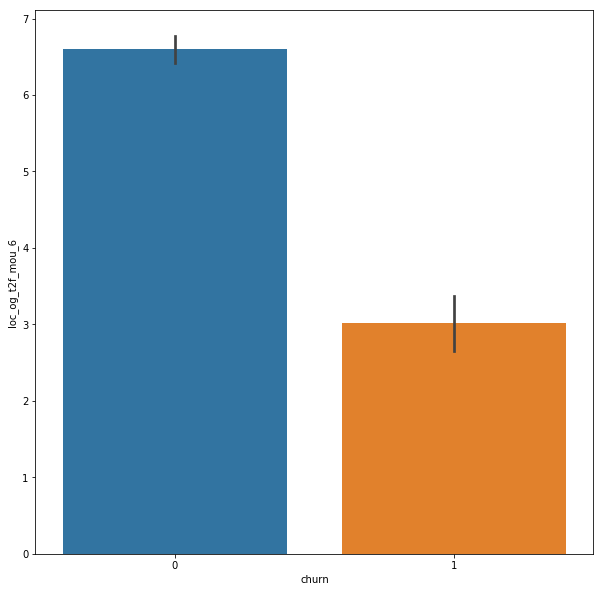

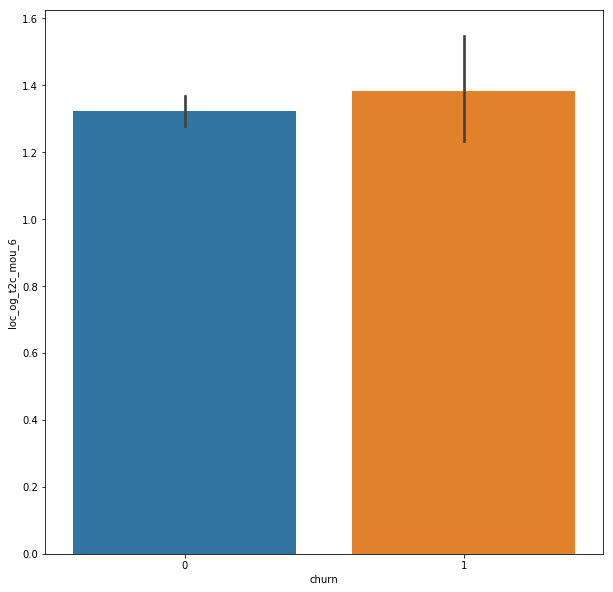

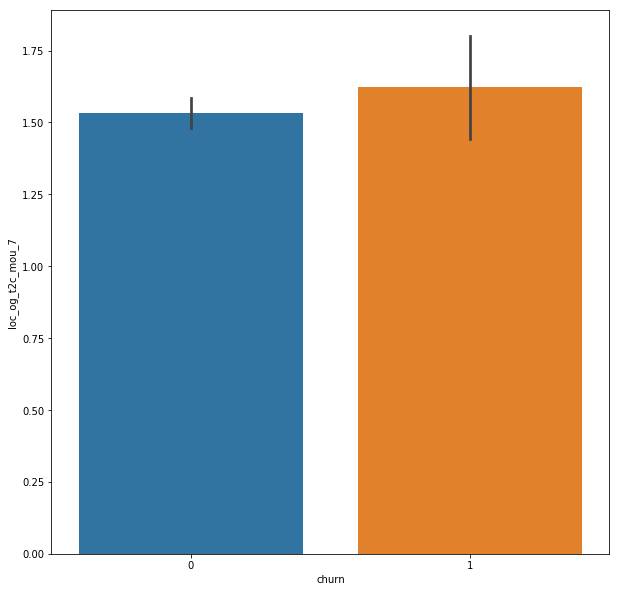

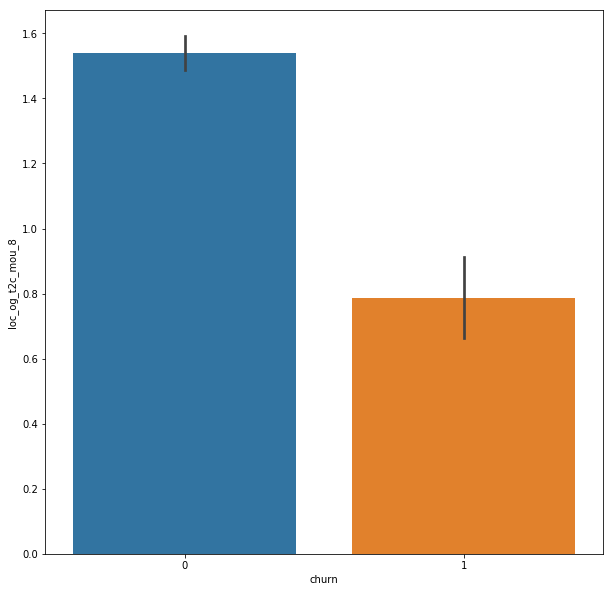

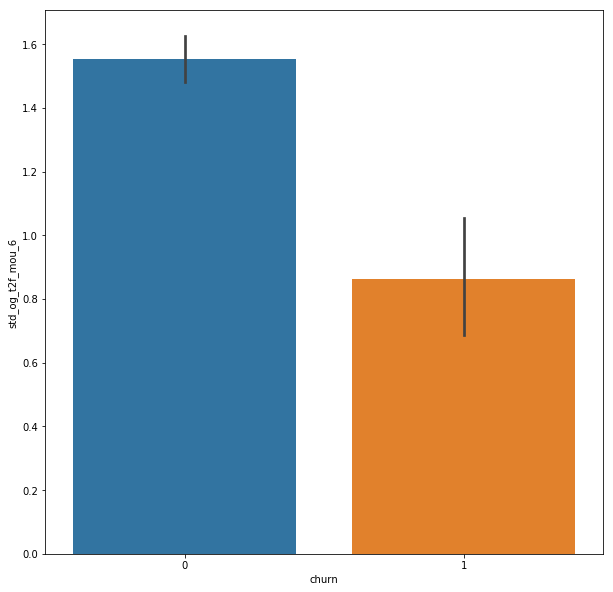

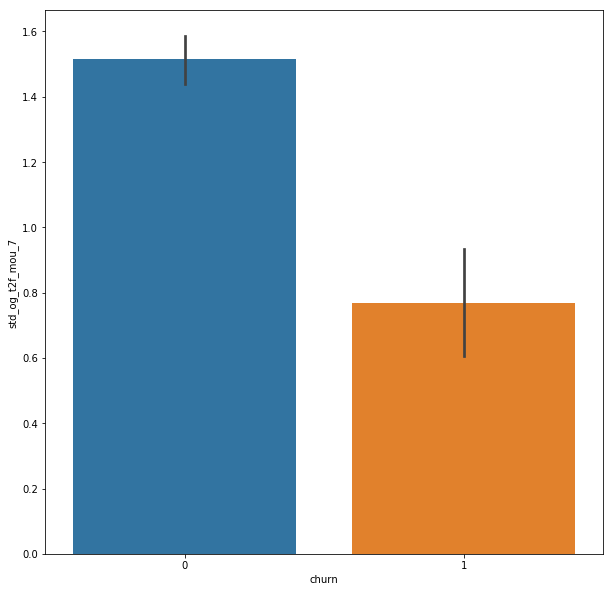

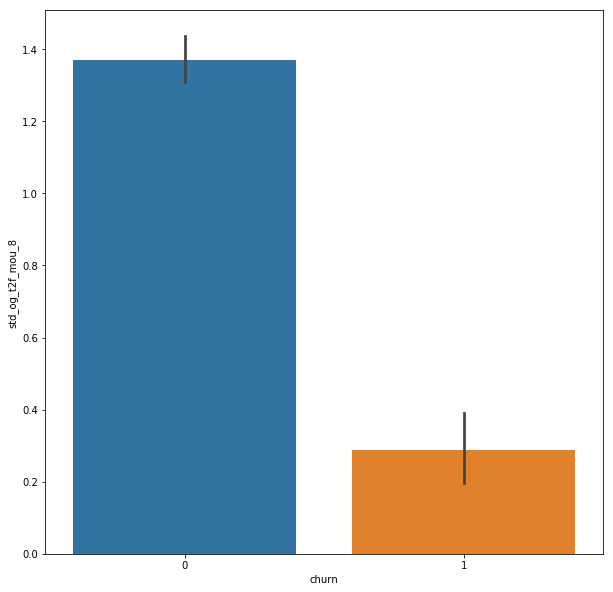

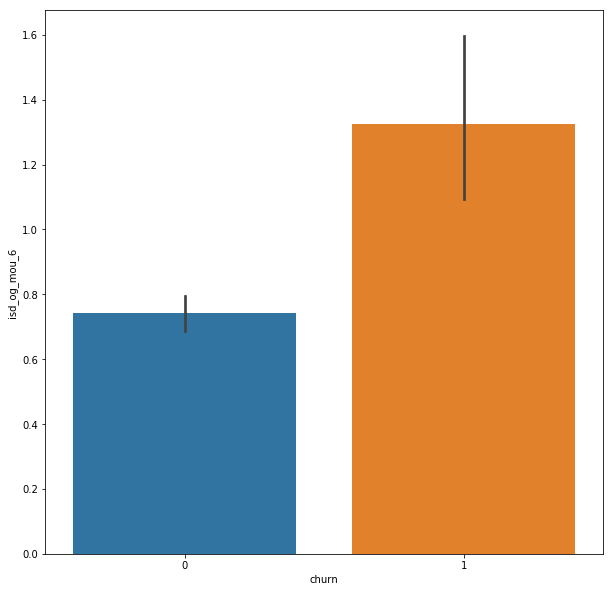

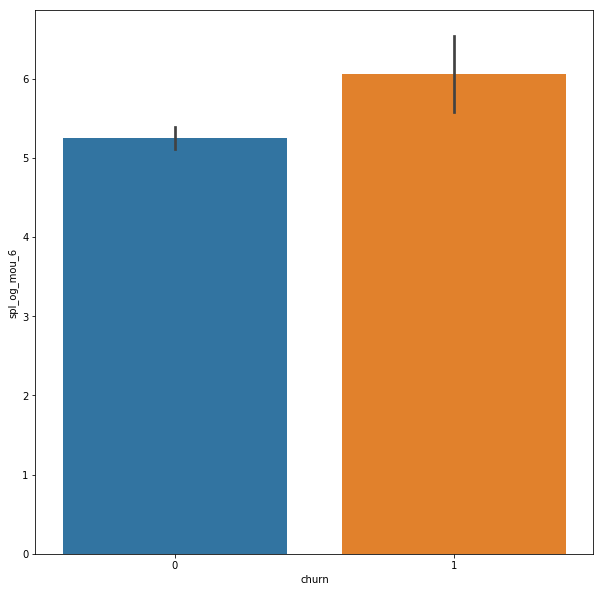

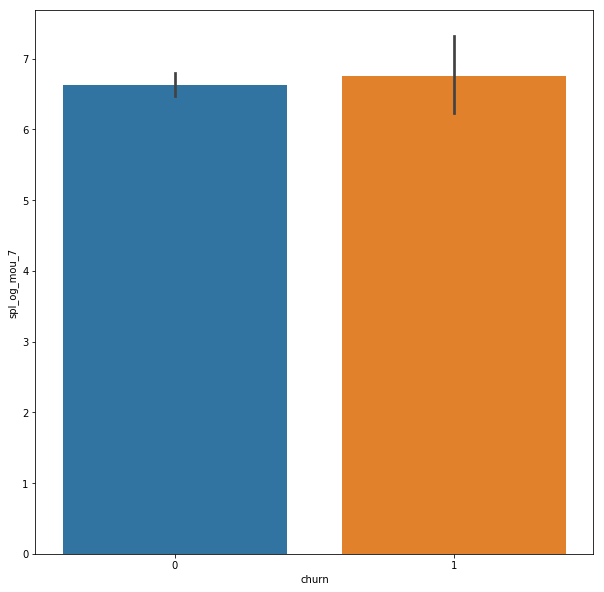

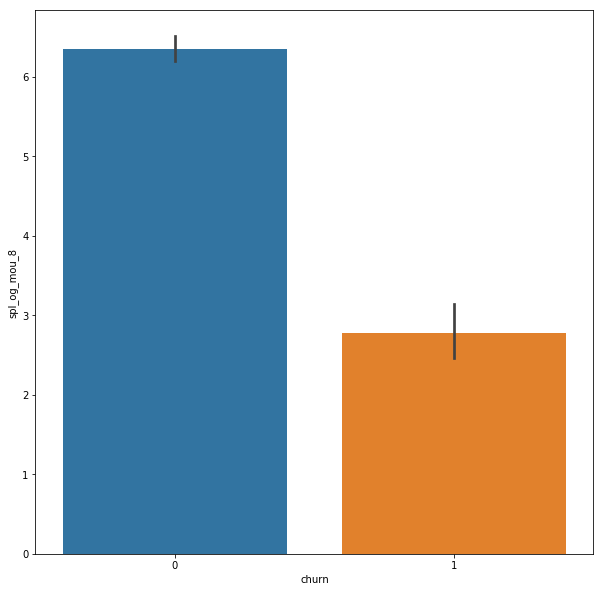

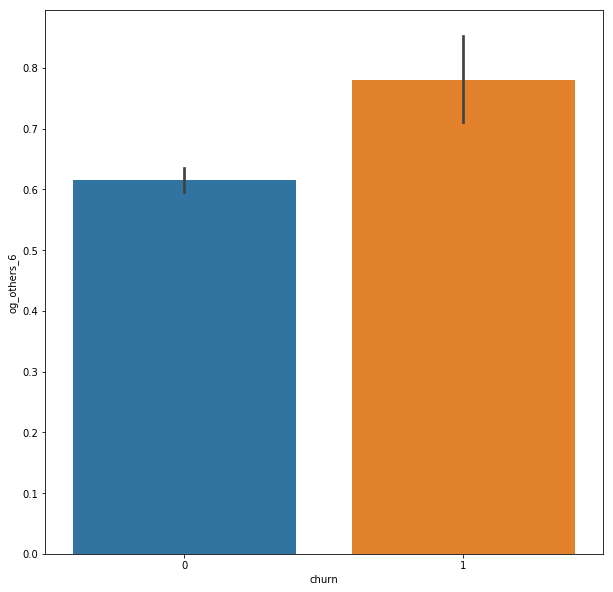

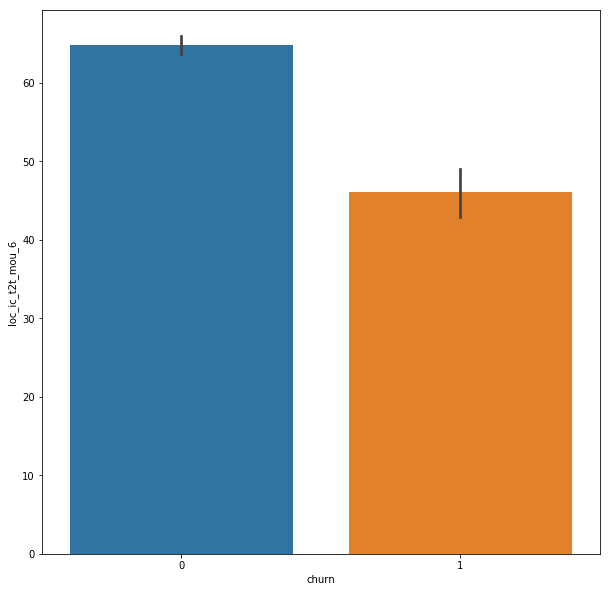

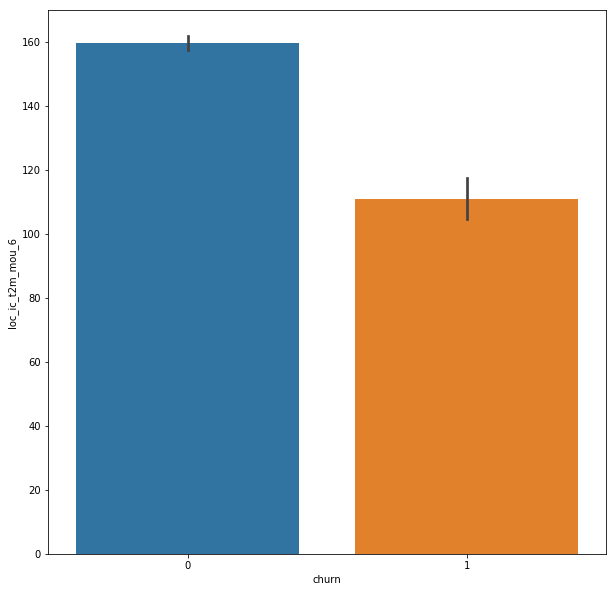

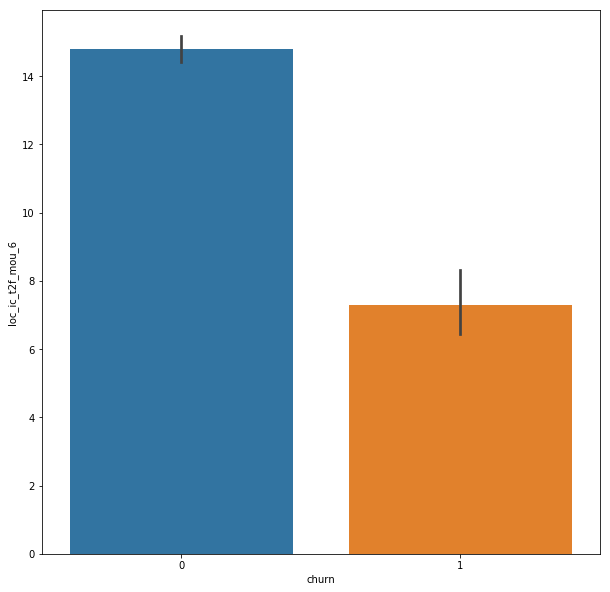

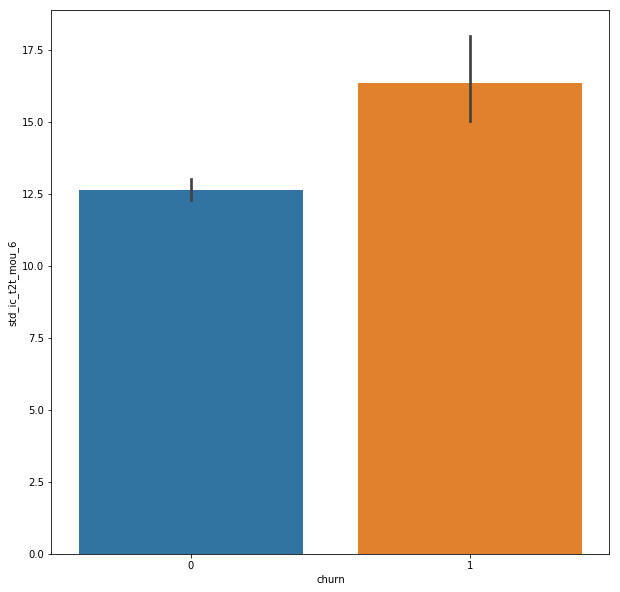

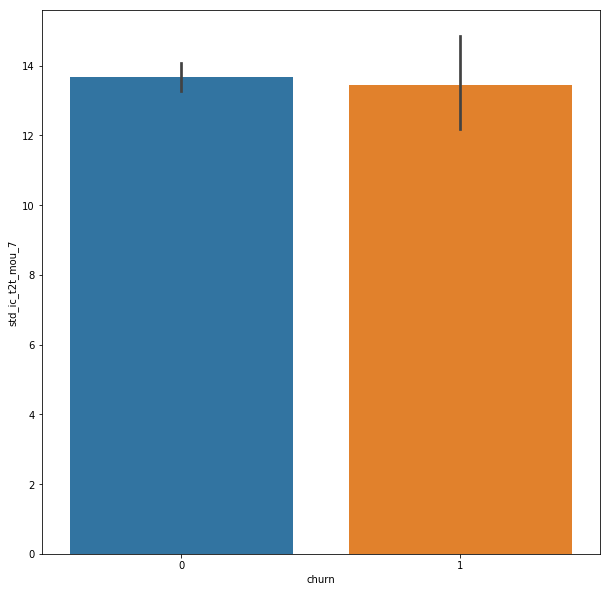

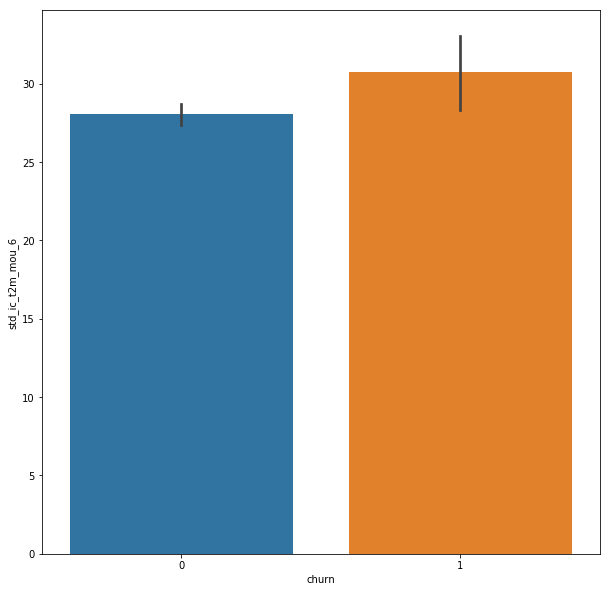

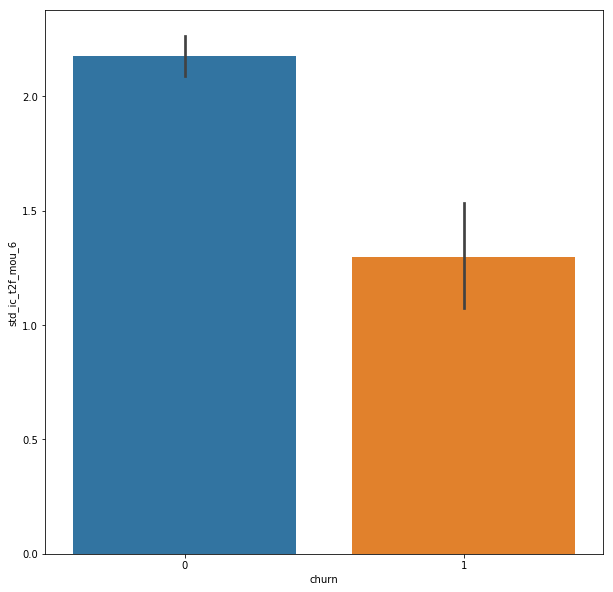

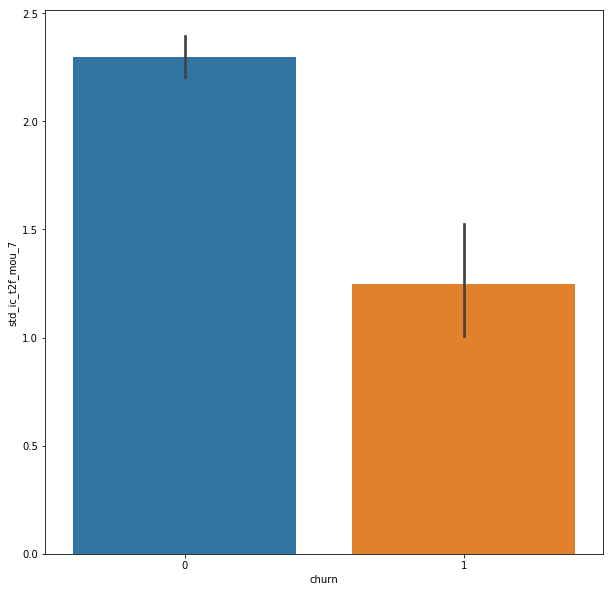

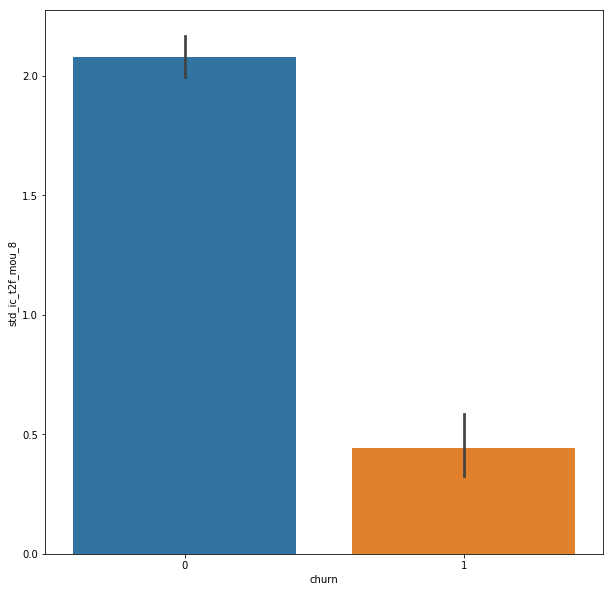

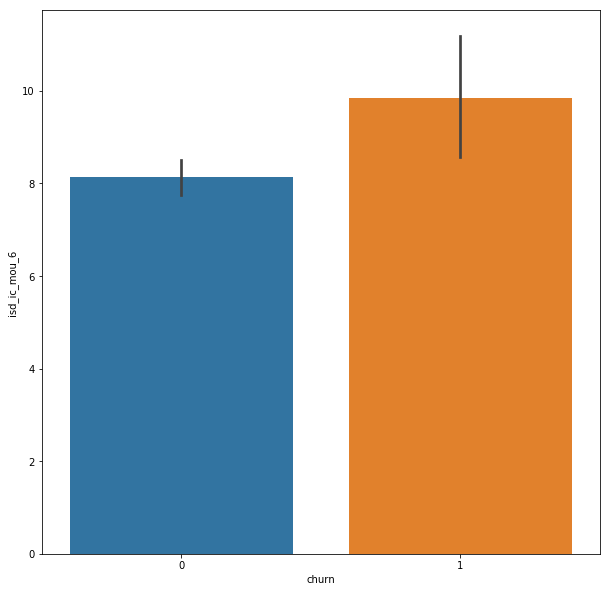

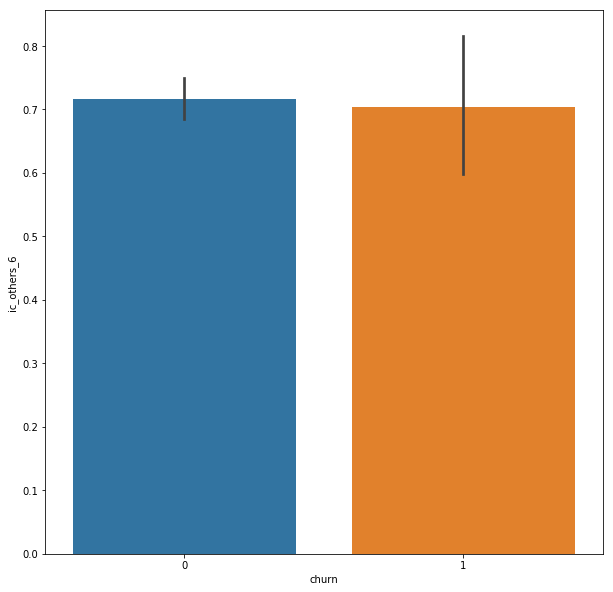

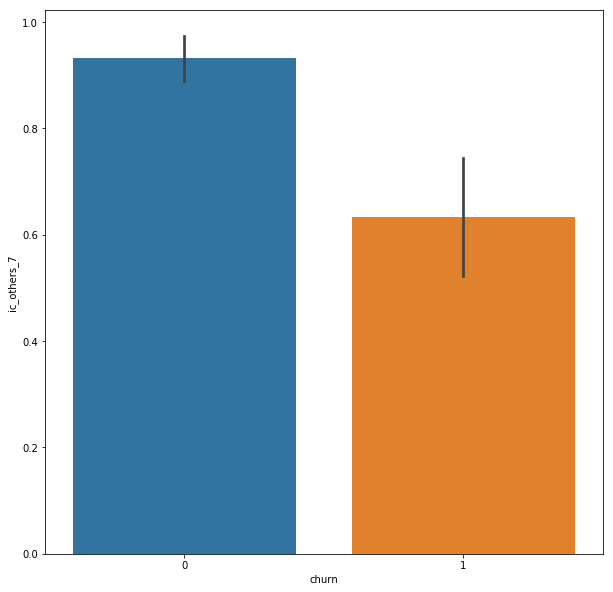

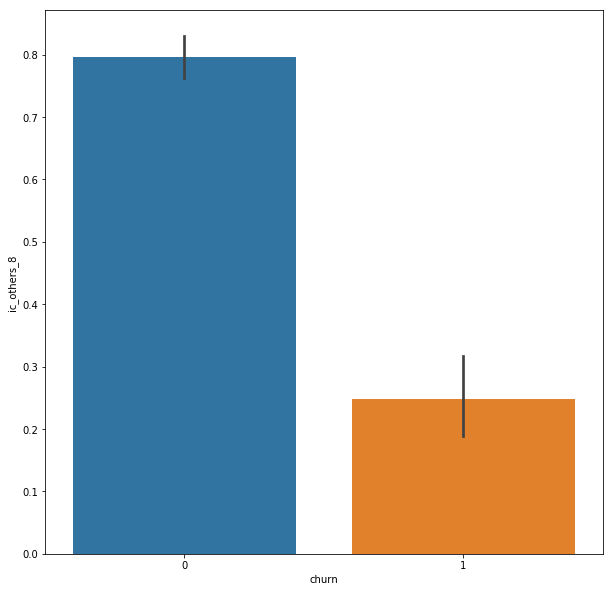

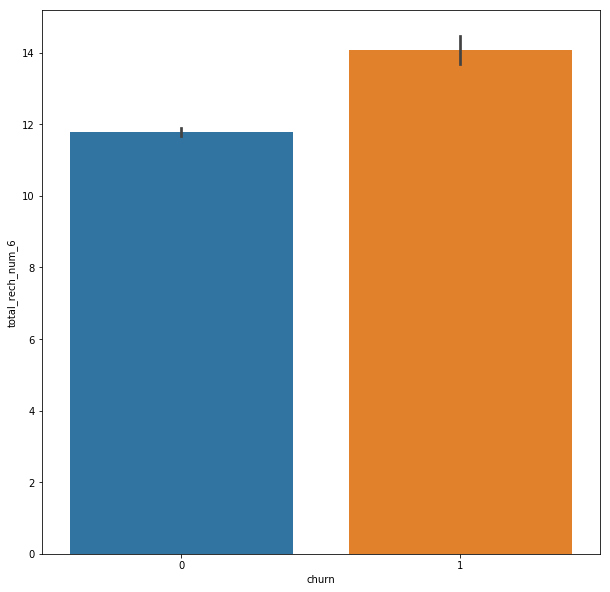

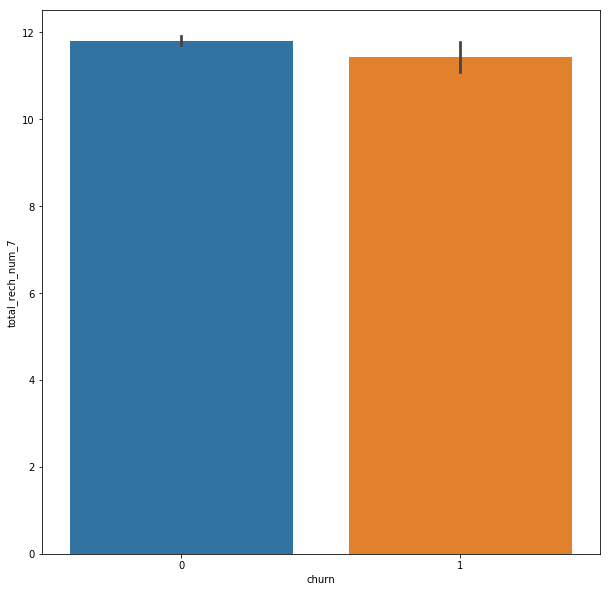

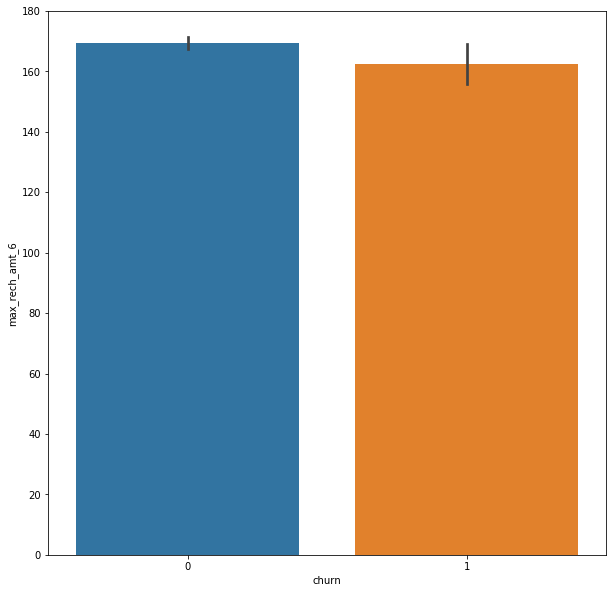

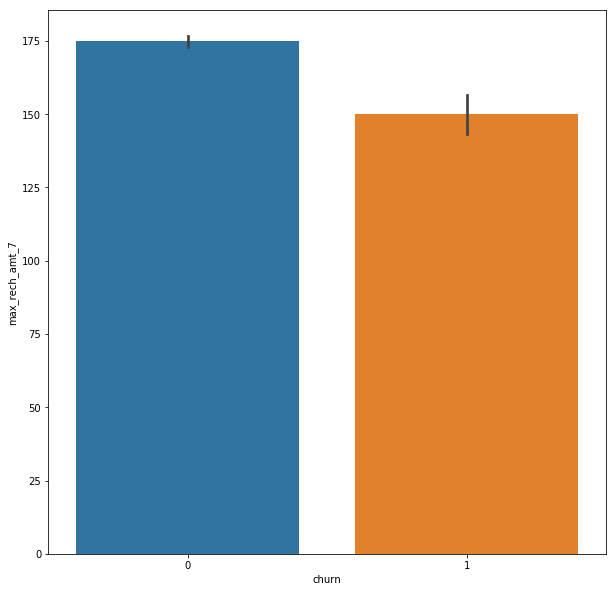

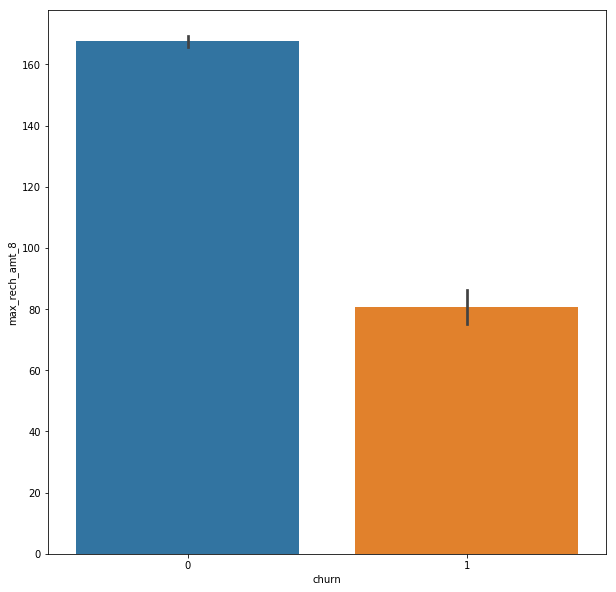

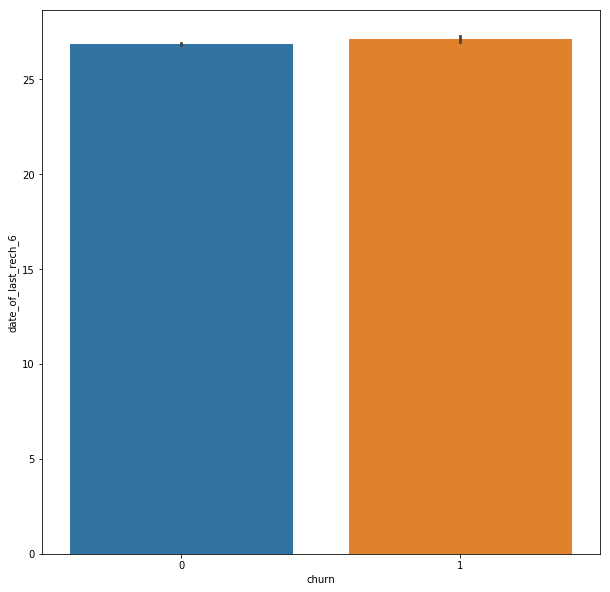

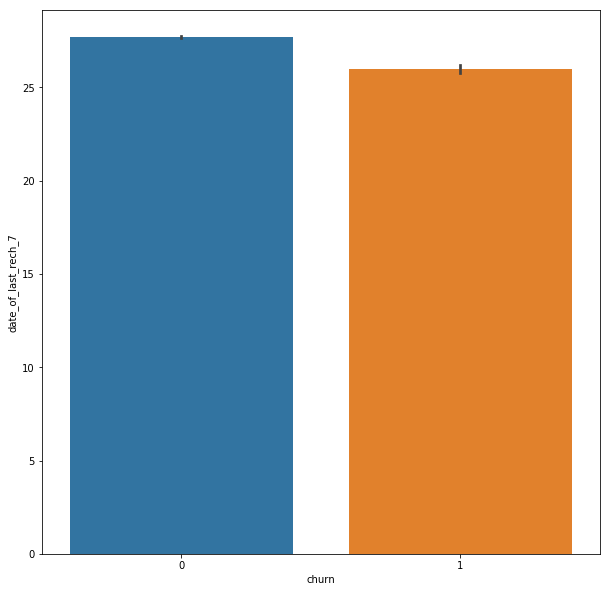

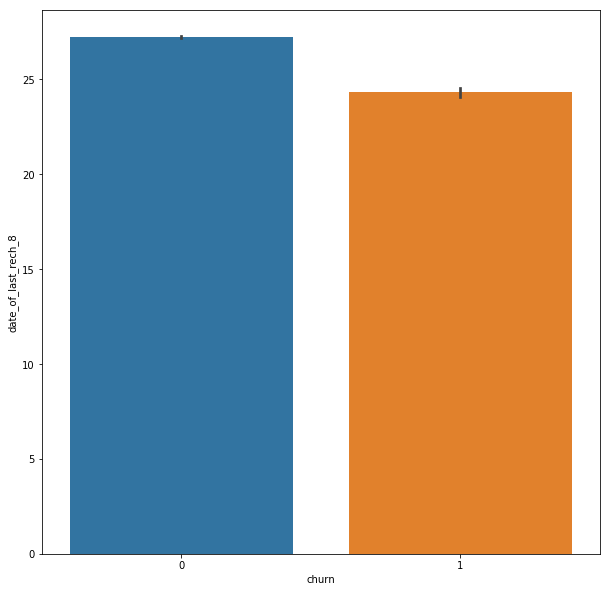

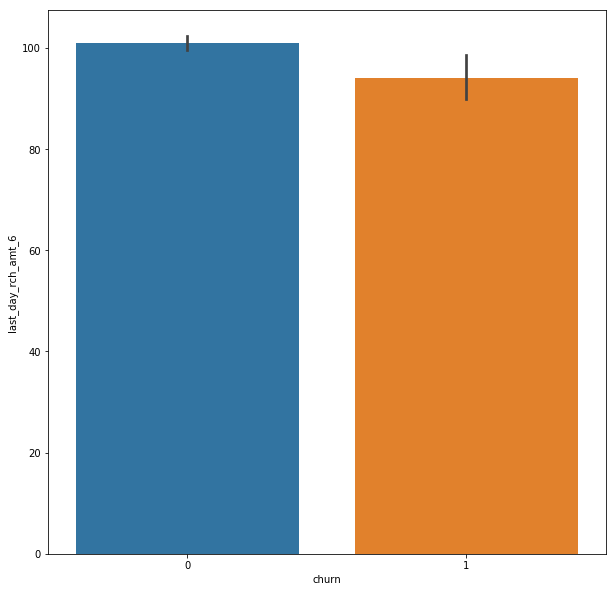

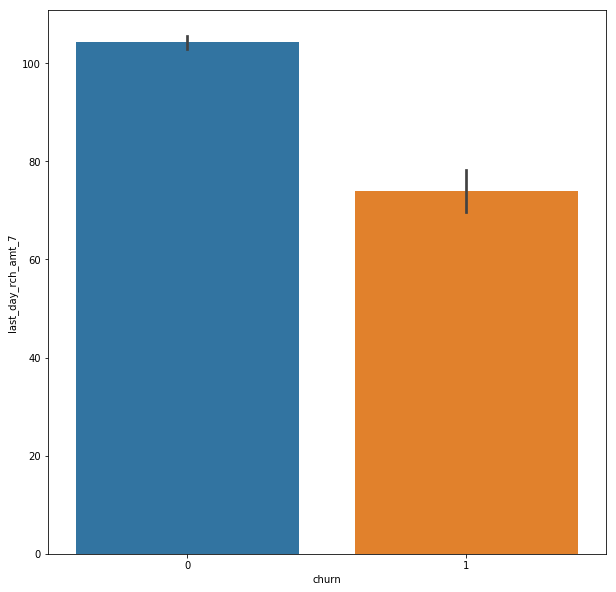

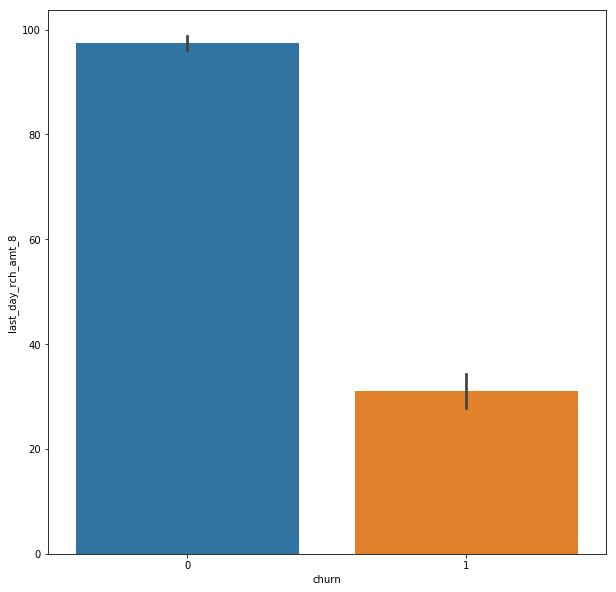

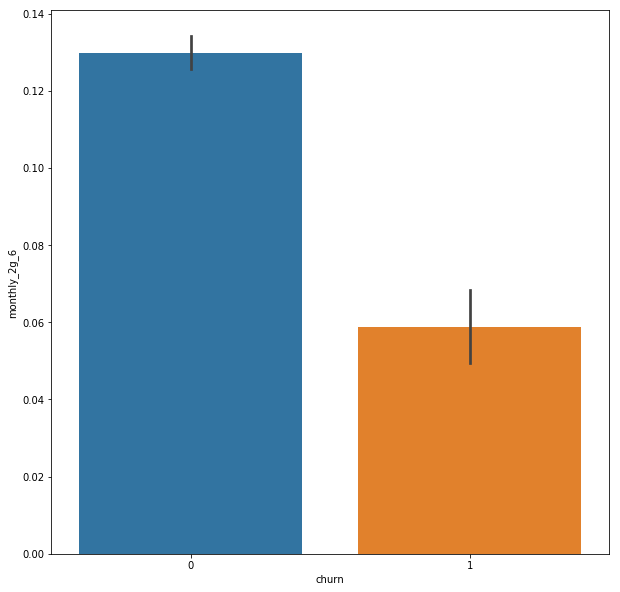

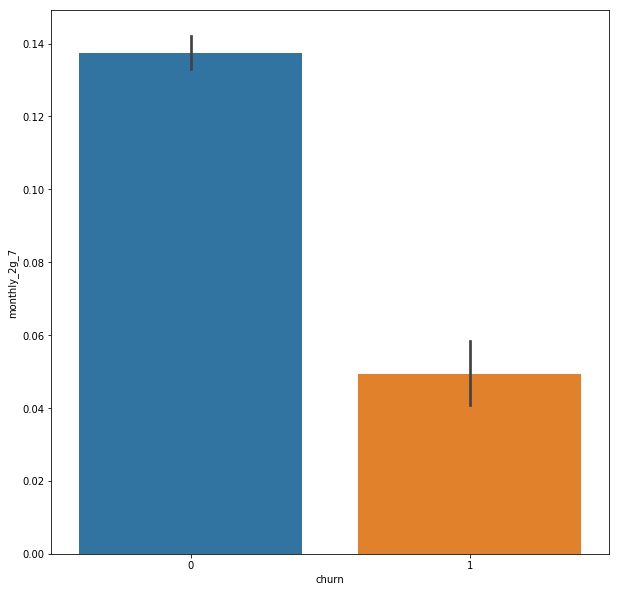

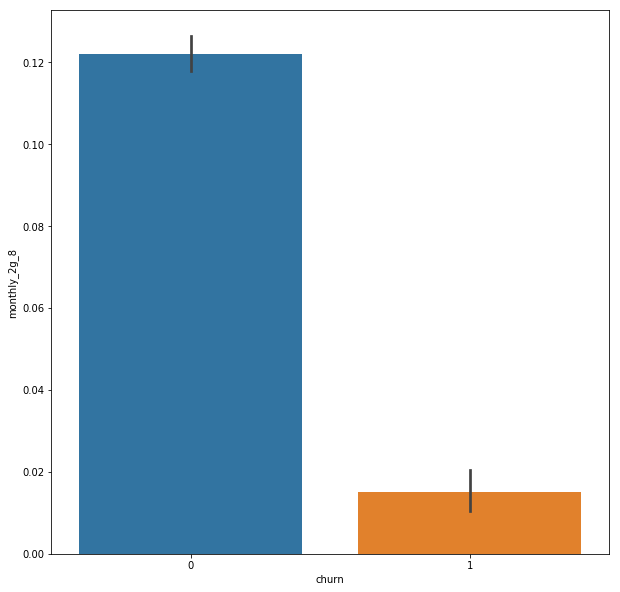

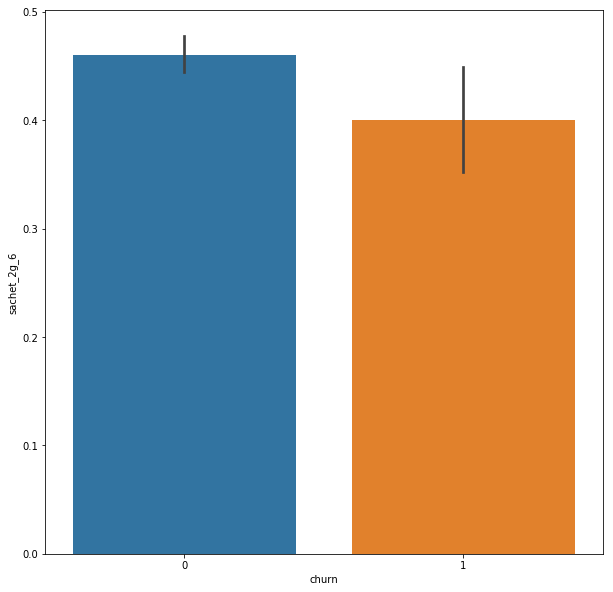

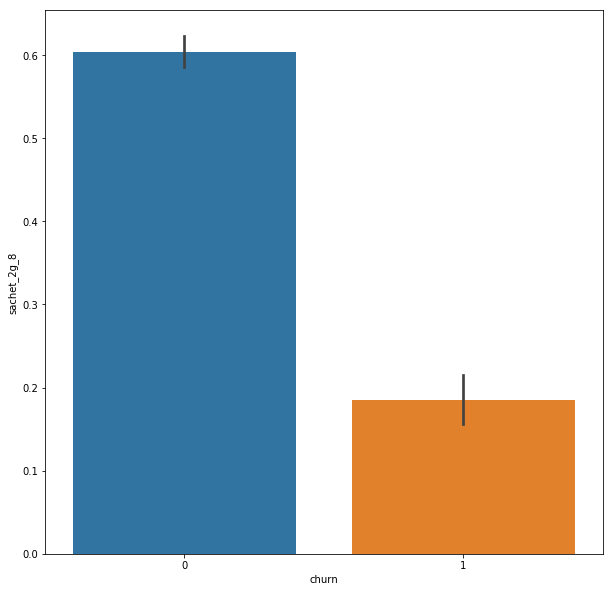

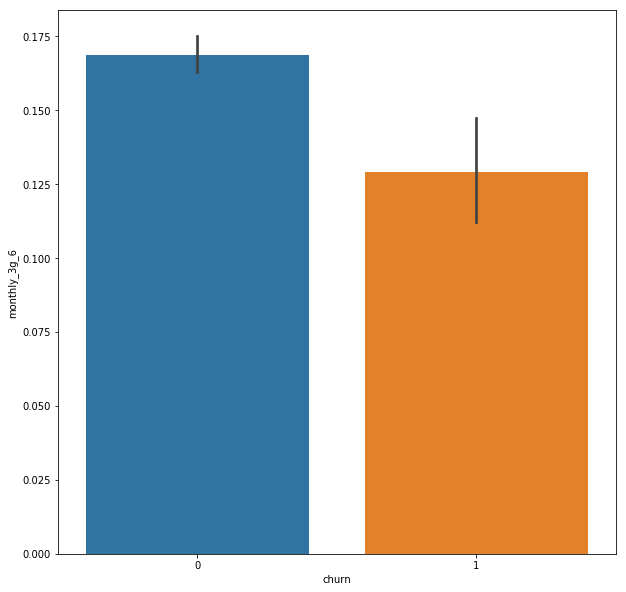

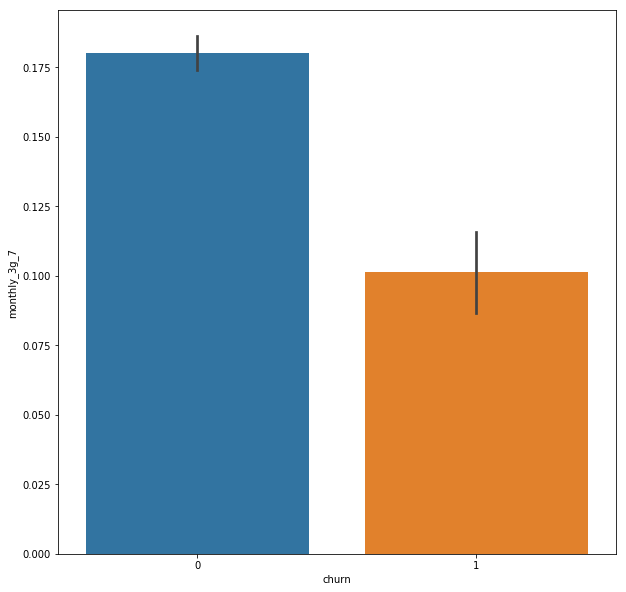

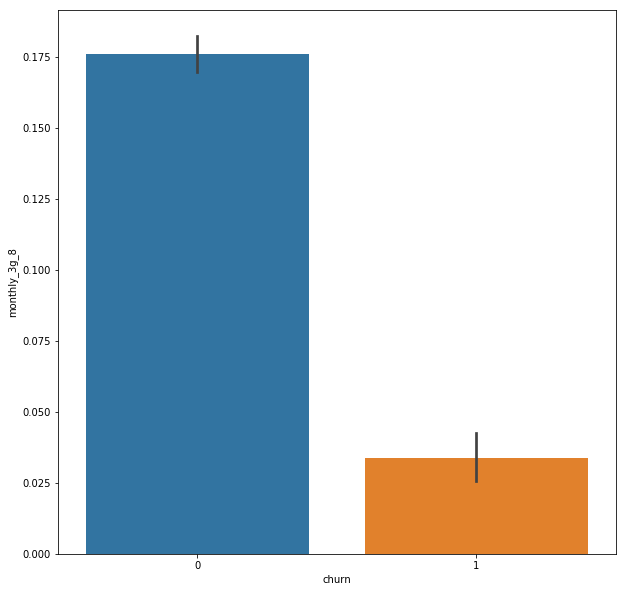

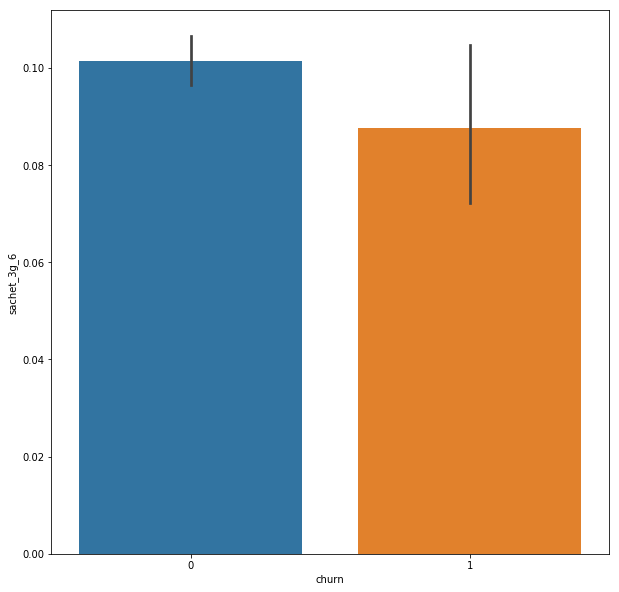

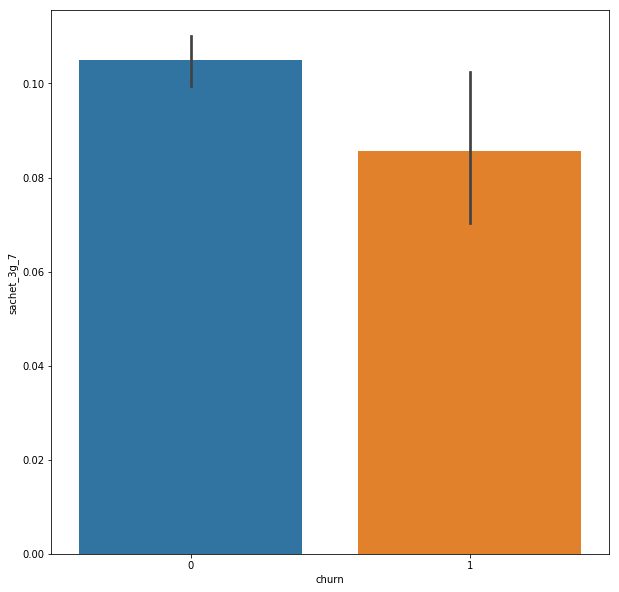

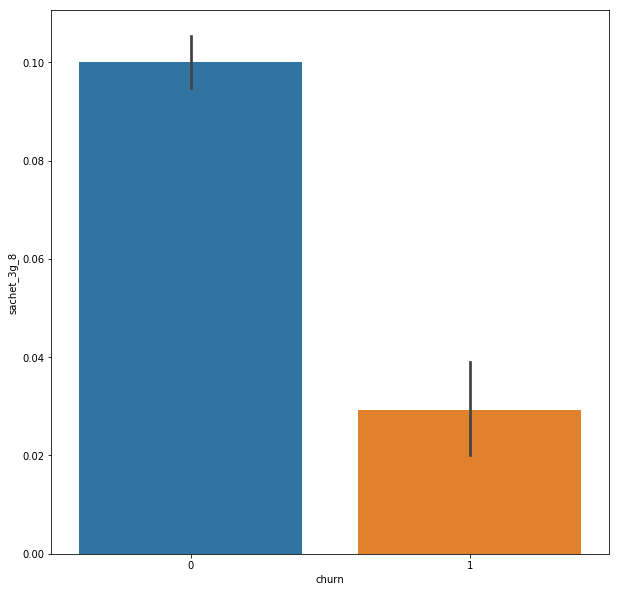

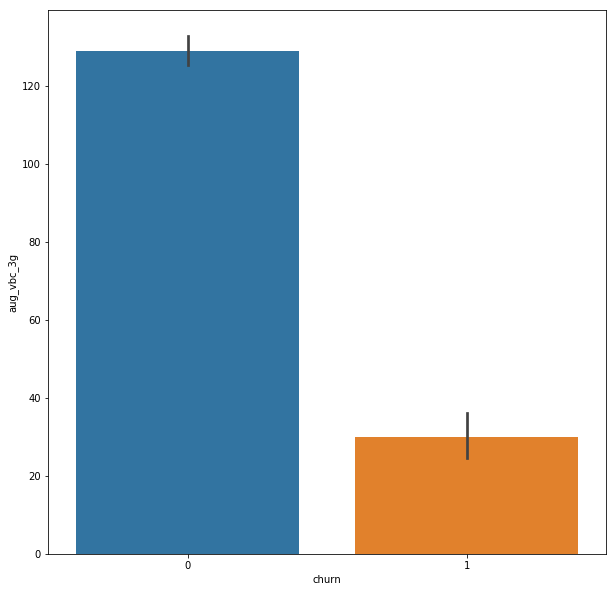

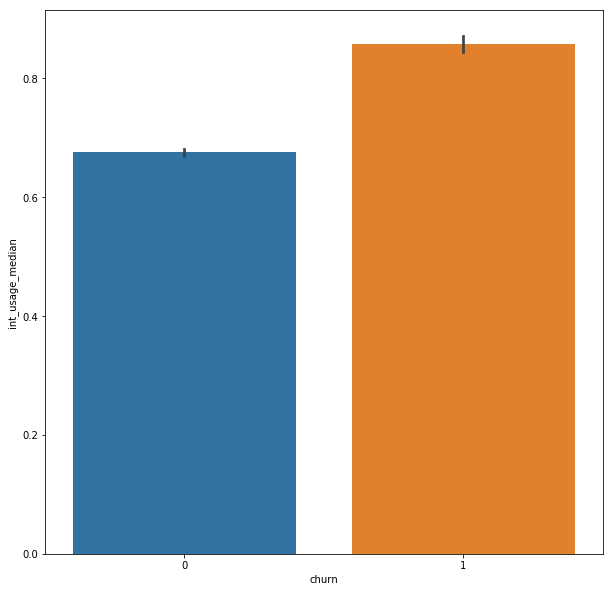

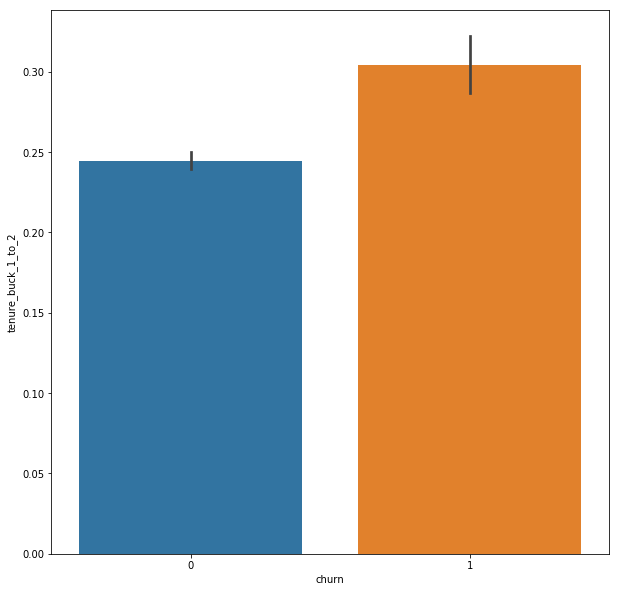

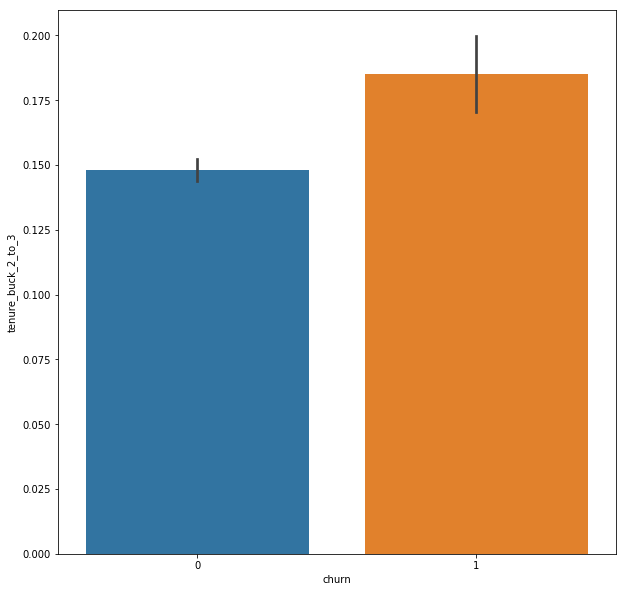

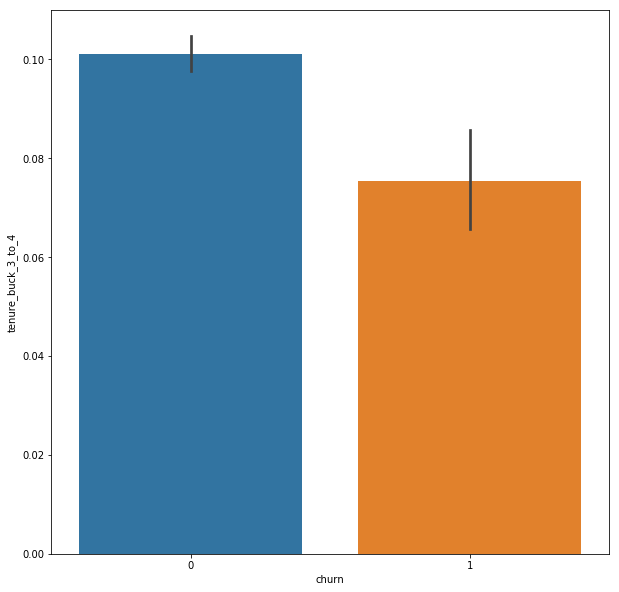

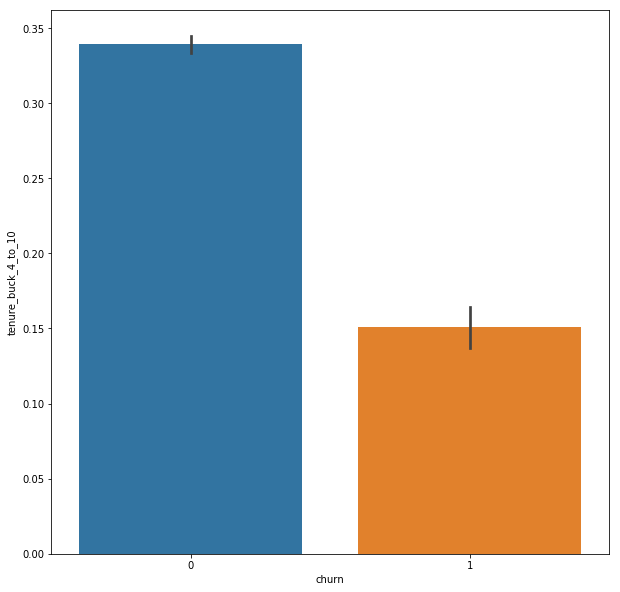

In [58]:
for col in cols:
    plt.figure(figsize=(10, 10))
    sns.barplot(x='churn', y=col, data=telco_df4)
    plt.show()

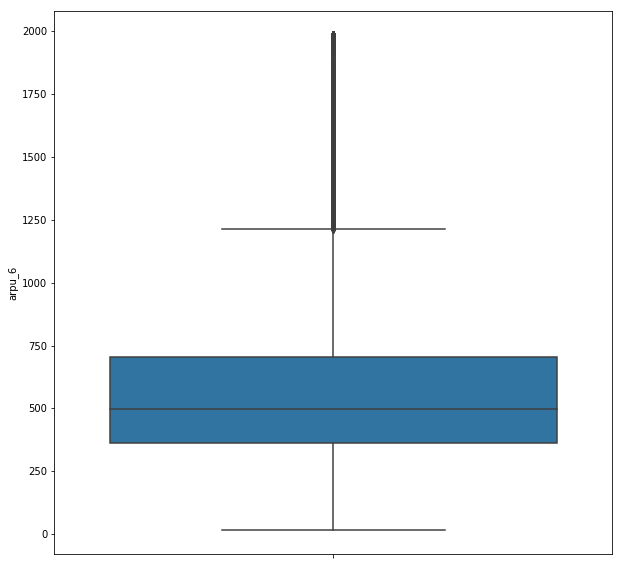

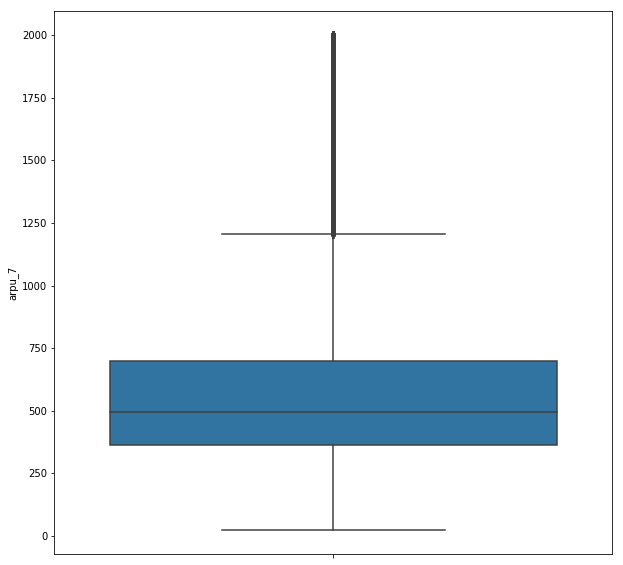

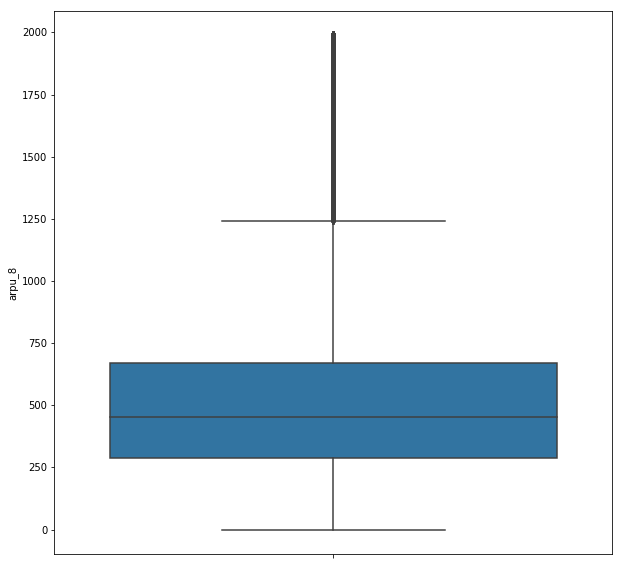

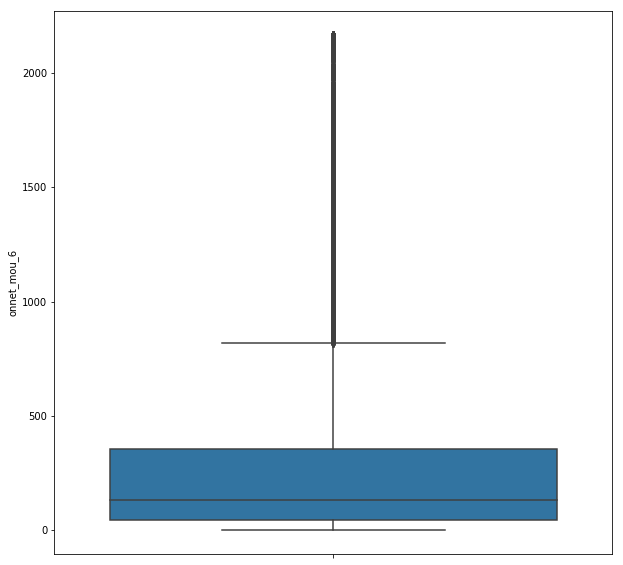

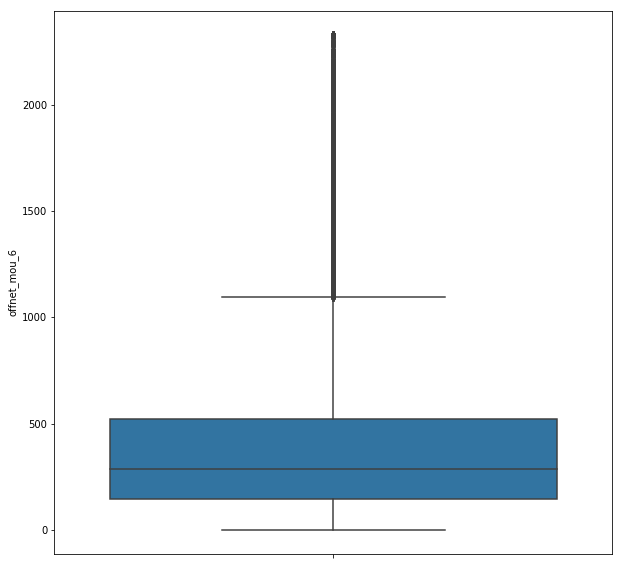

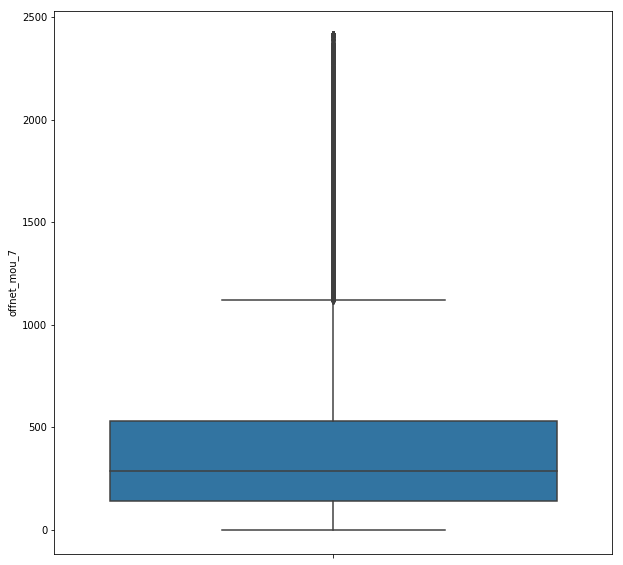

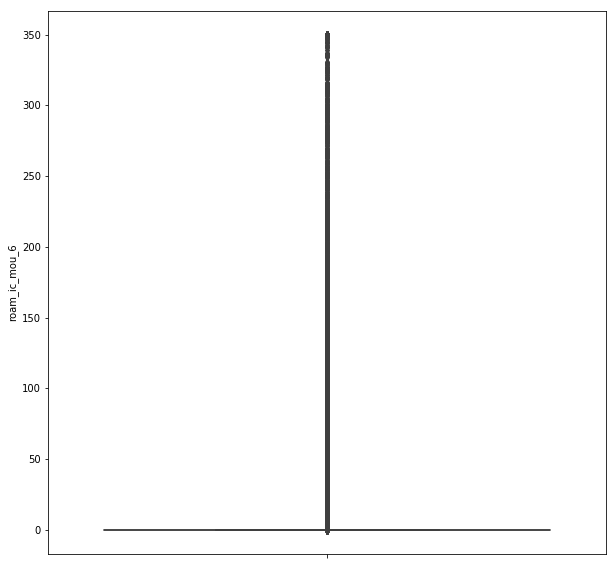

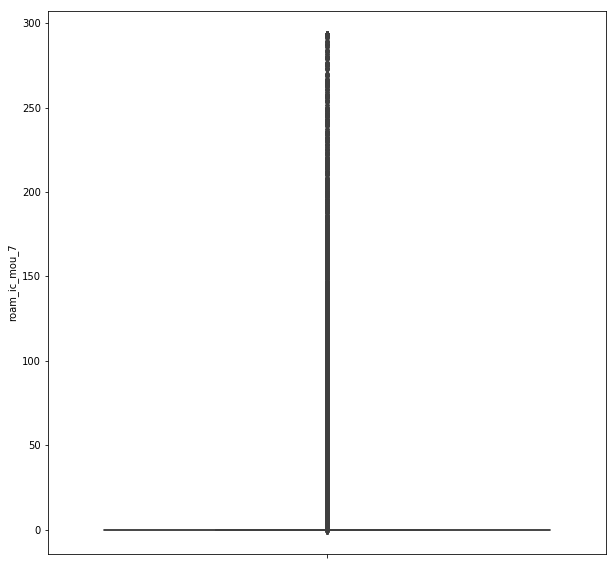

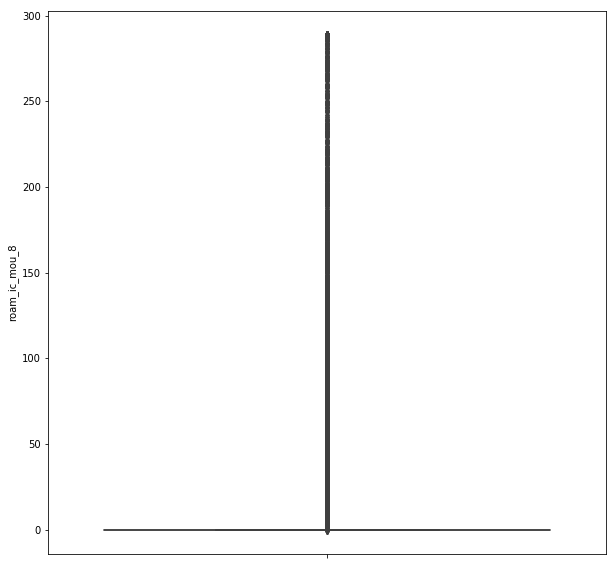

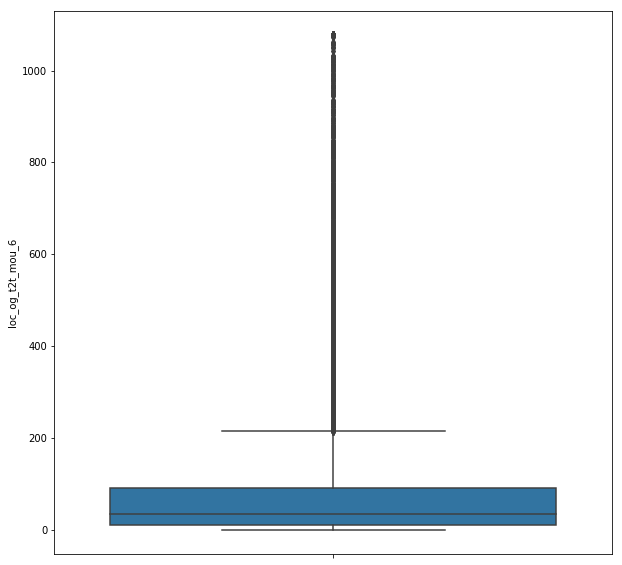

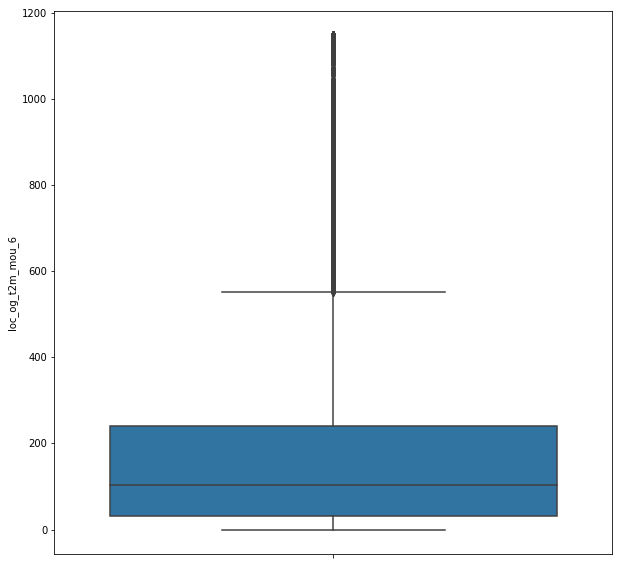

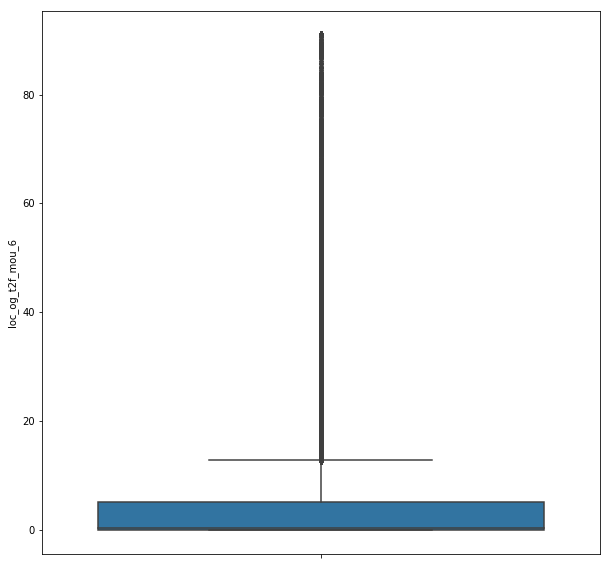

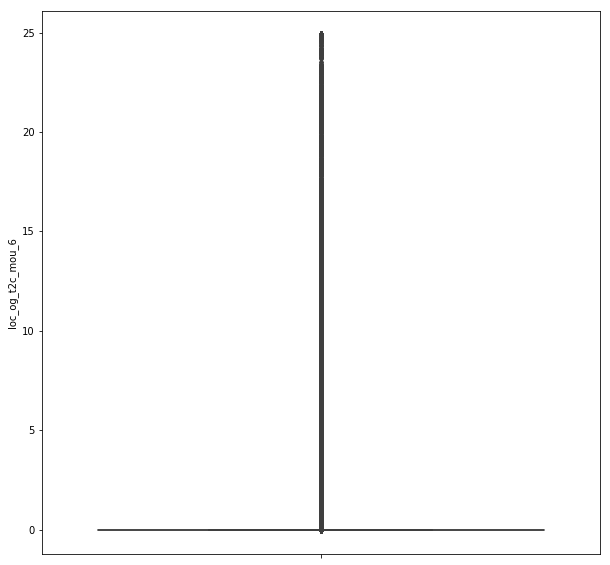

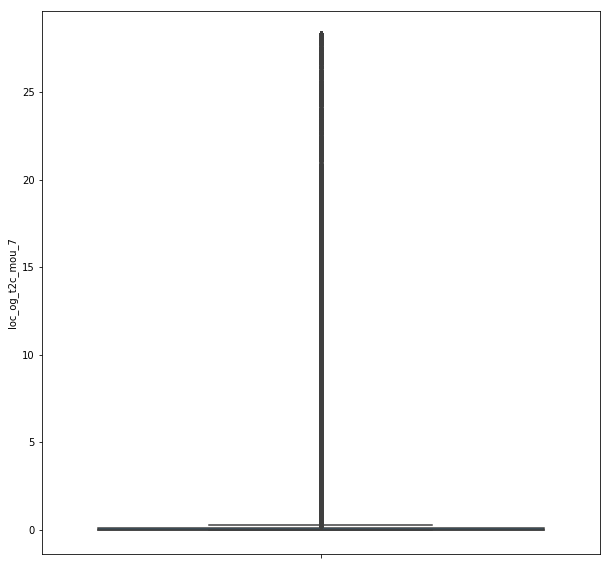

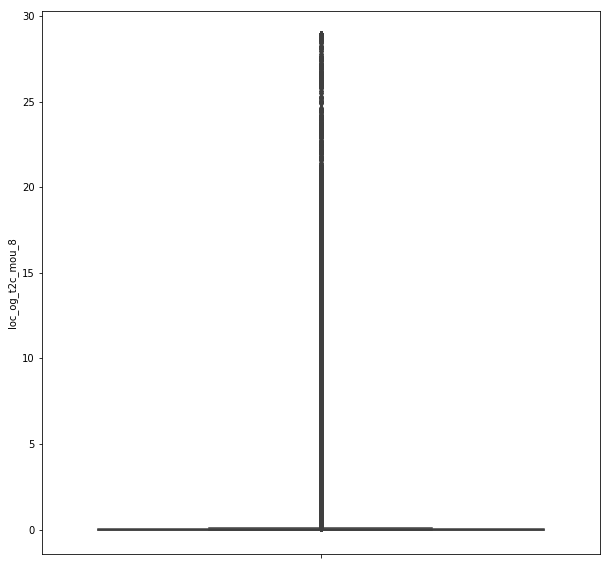

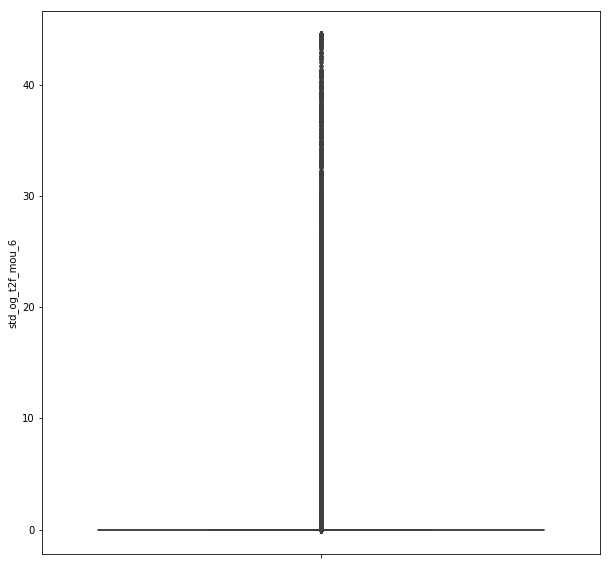

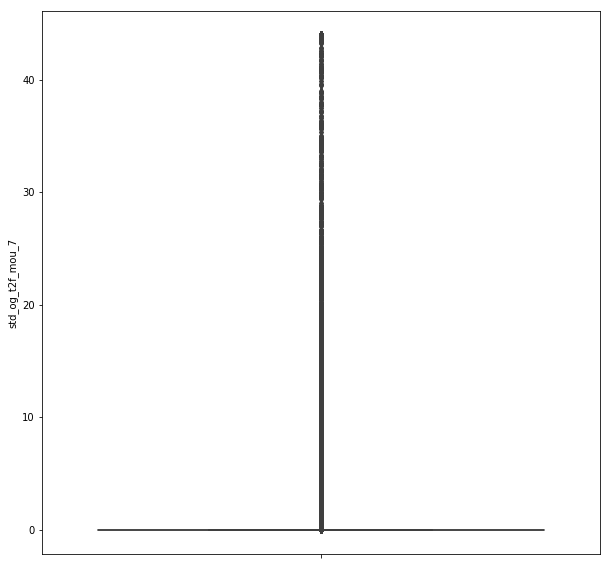

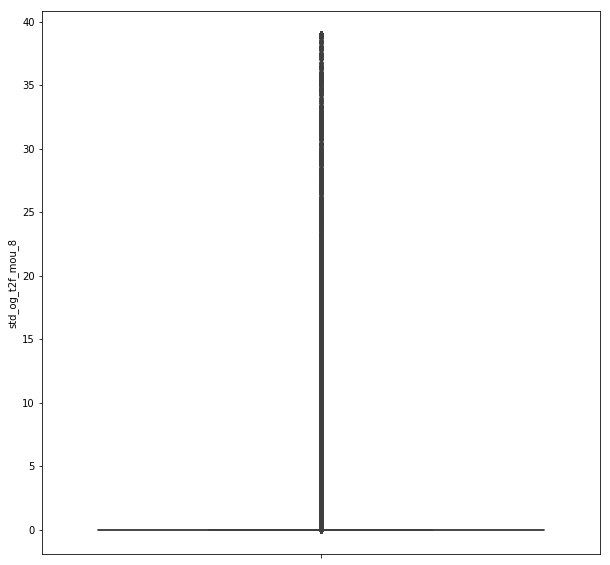

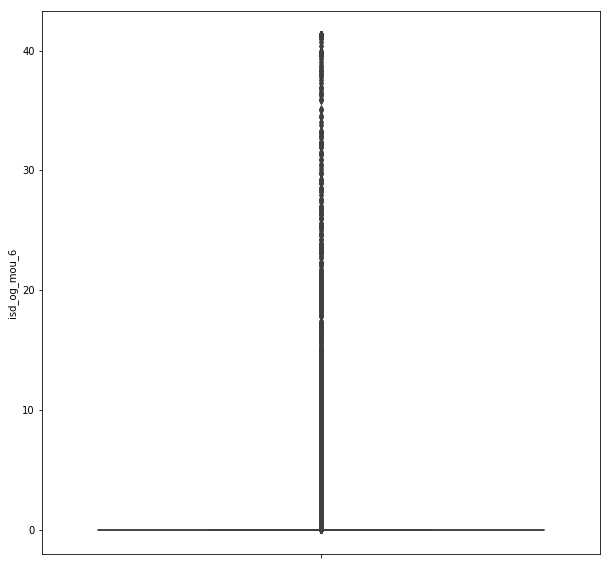

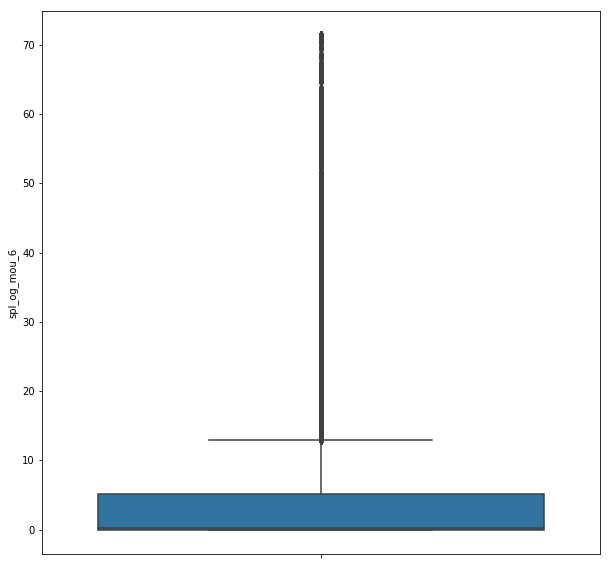

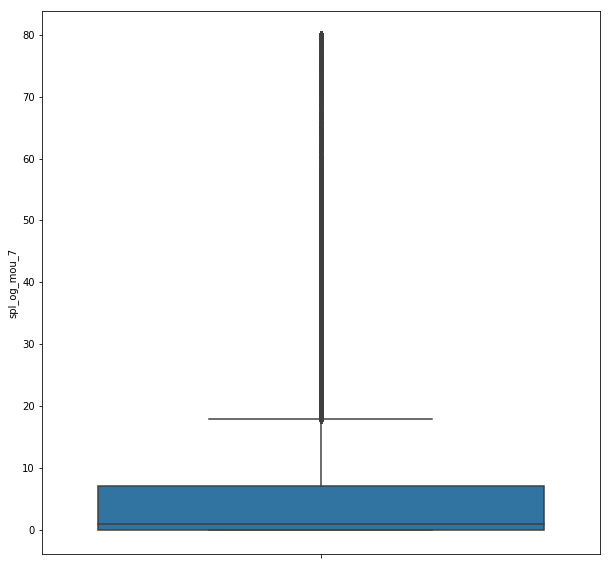

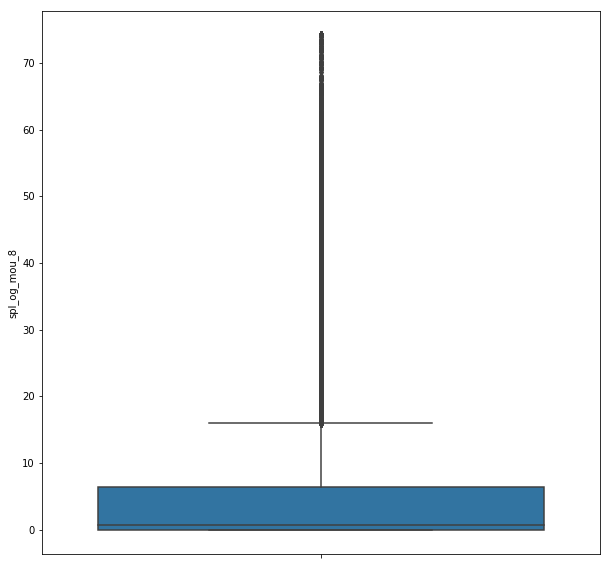

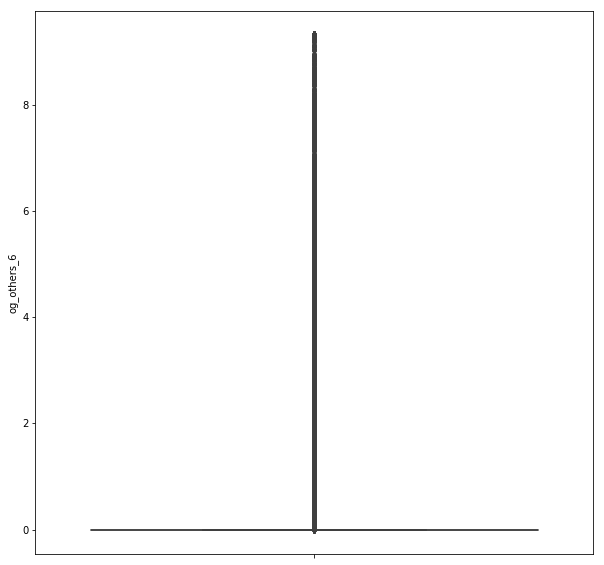

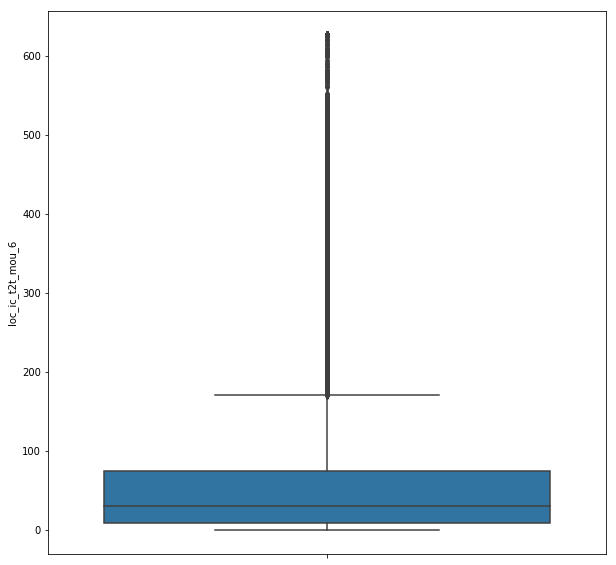

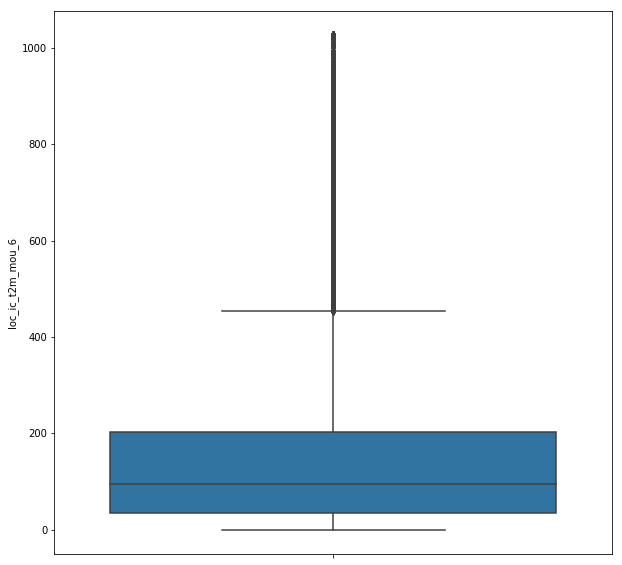

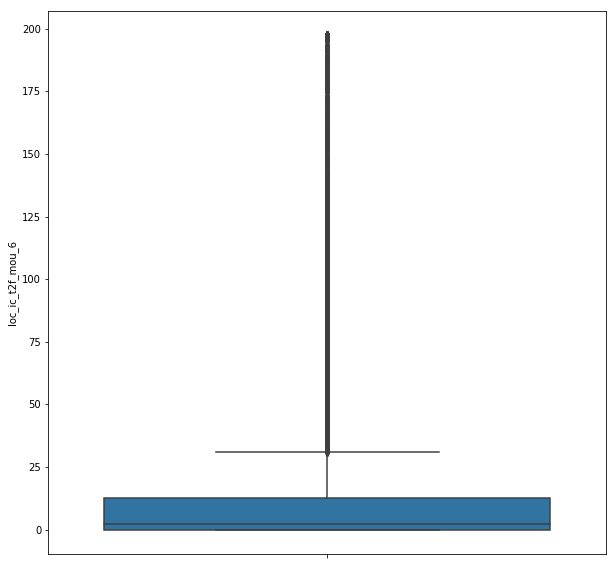

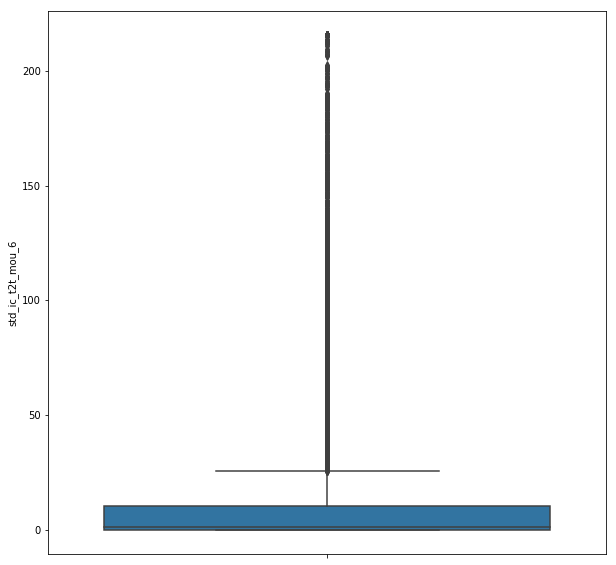

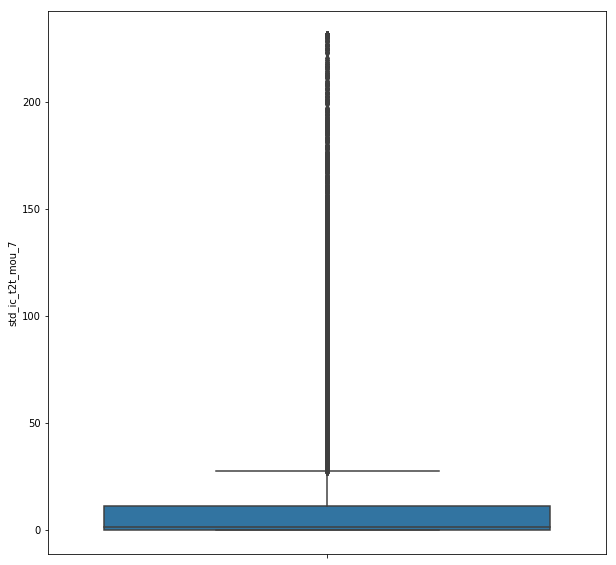

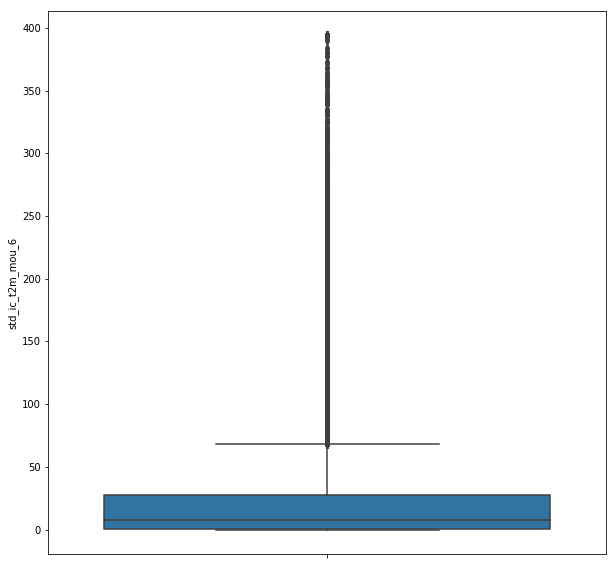

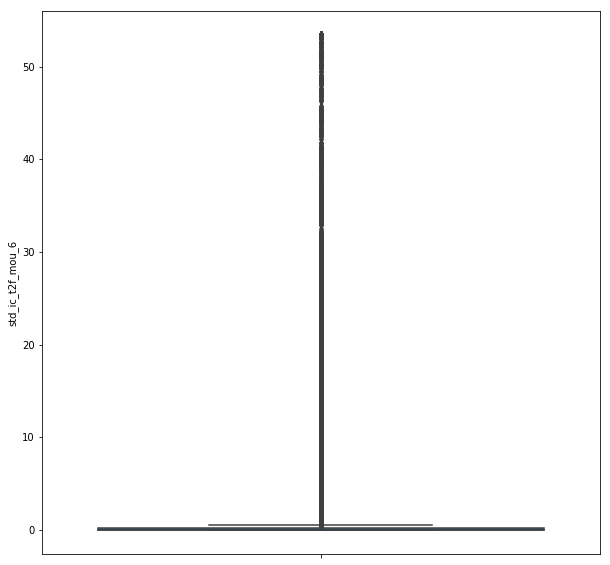

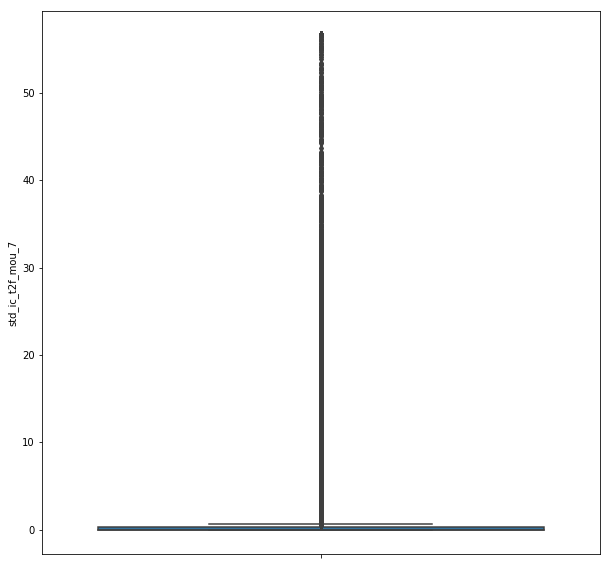

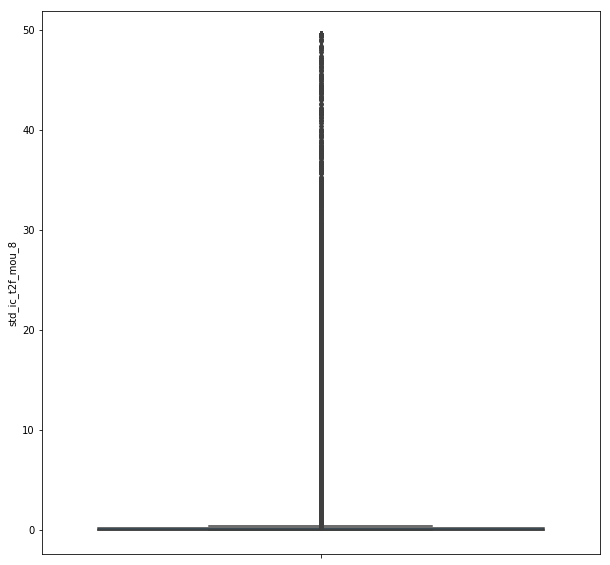

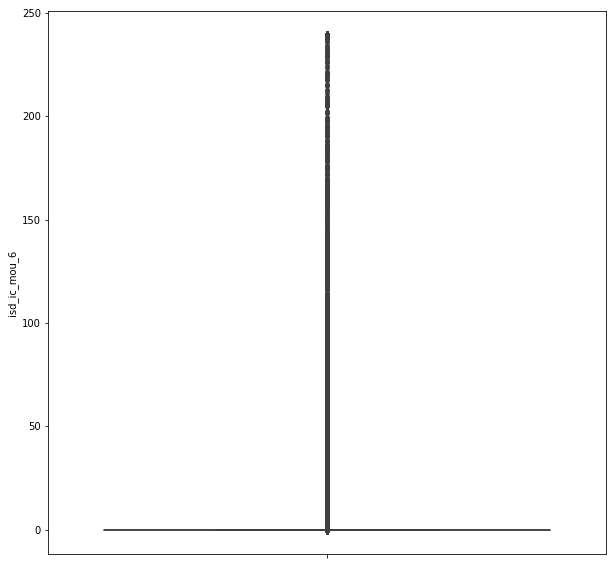

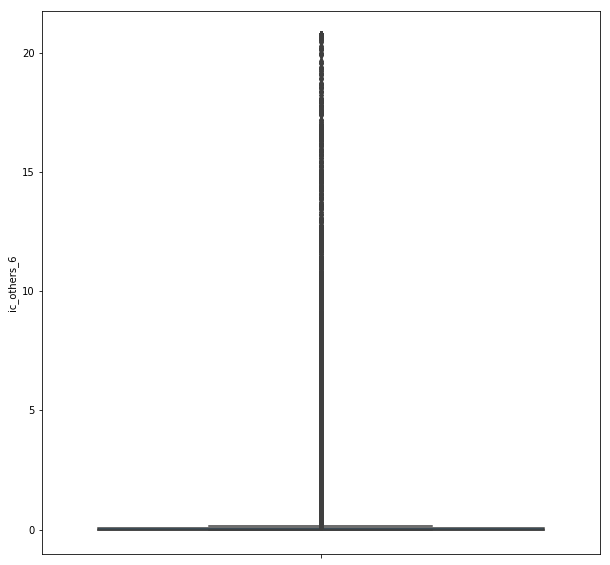

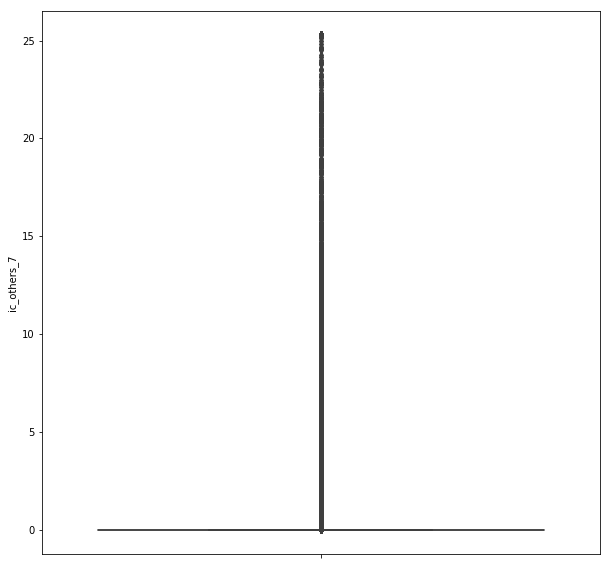

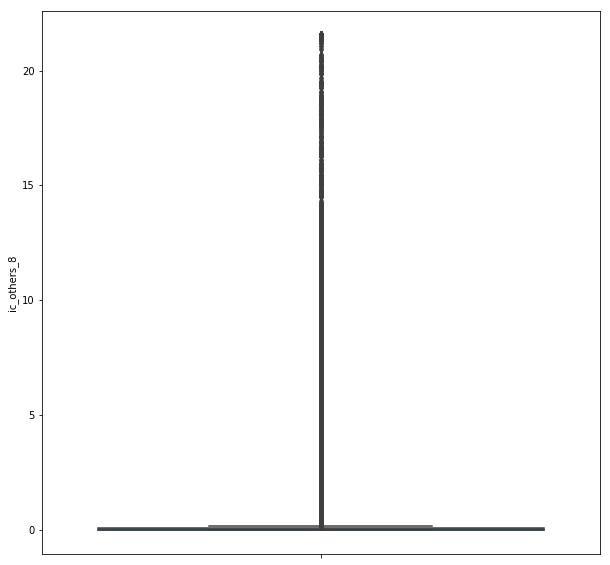

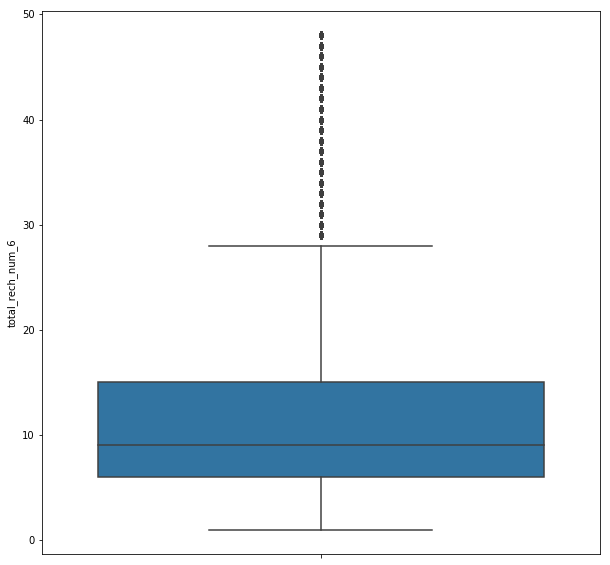

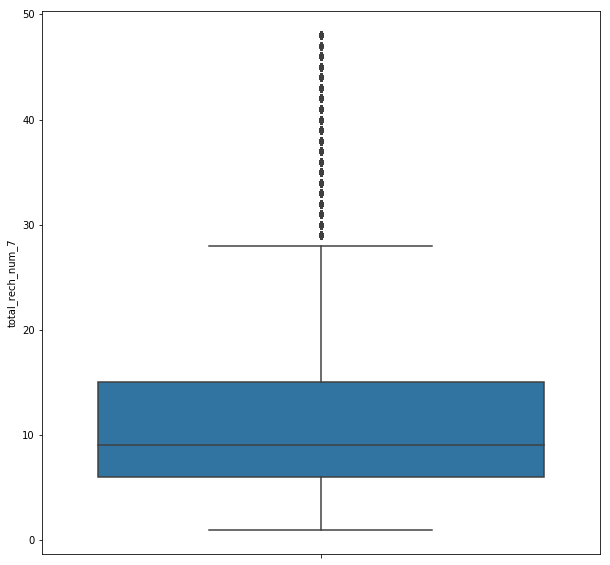

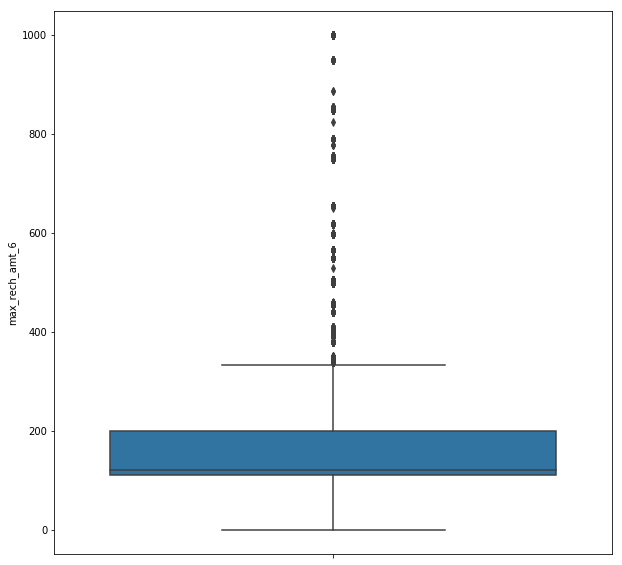

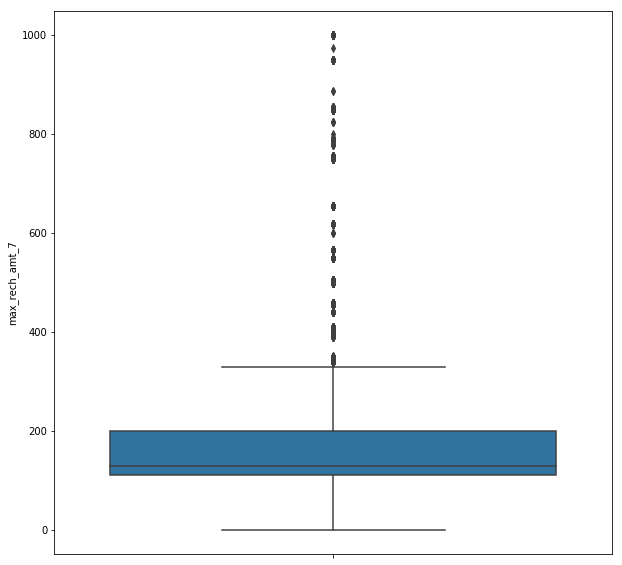

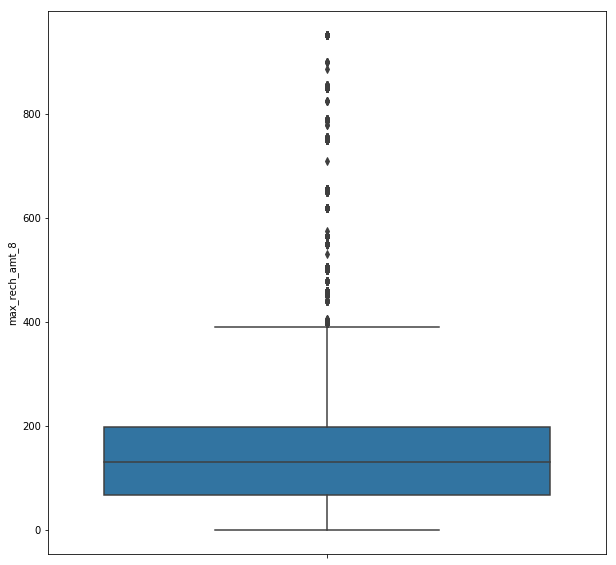

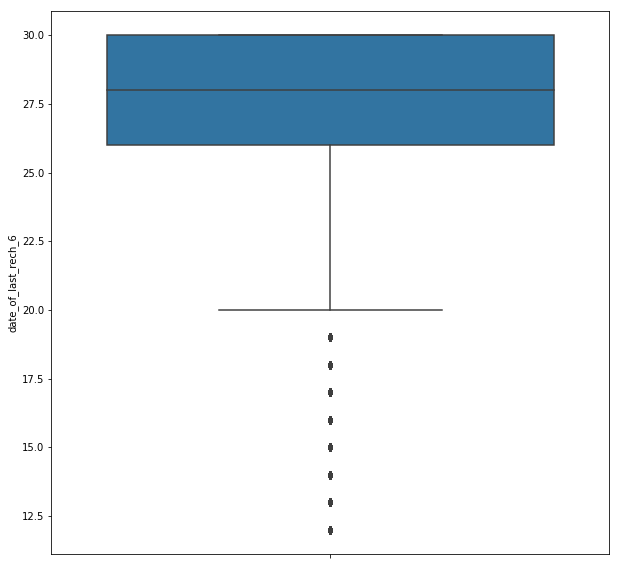

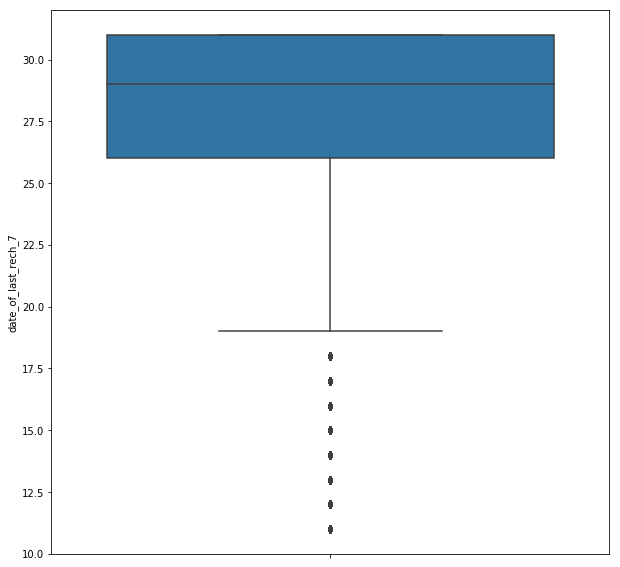

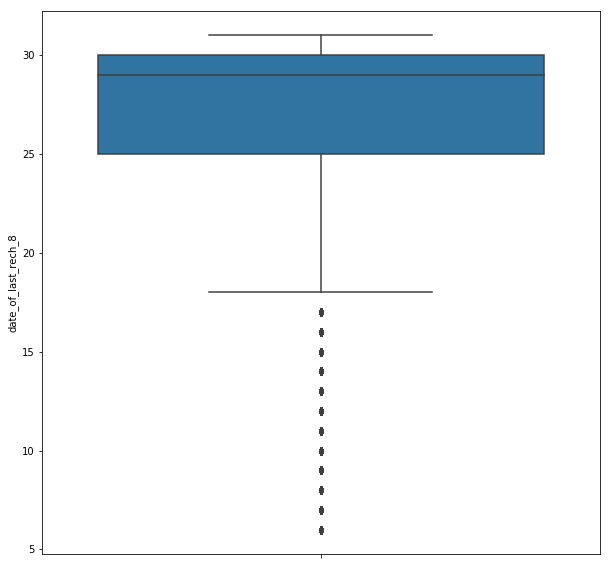

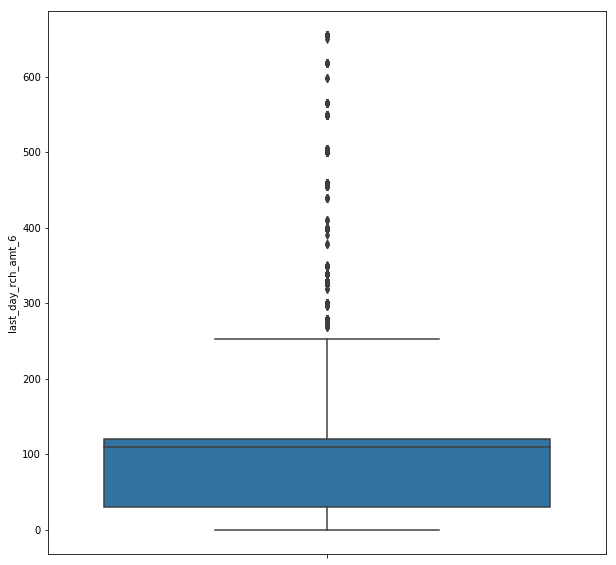

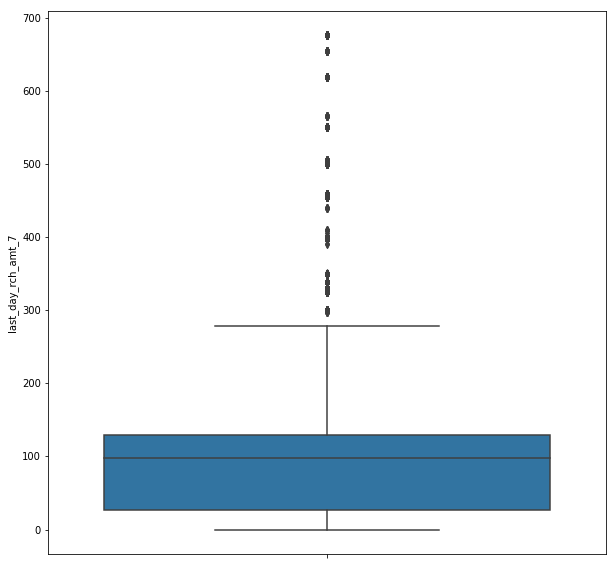

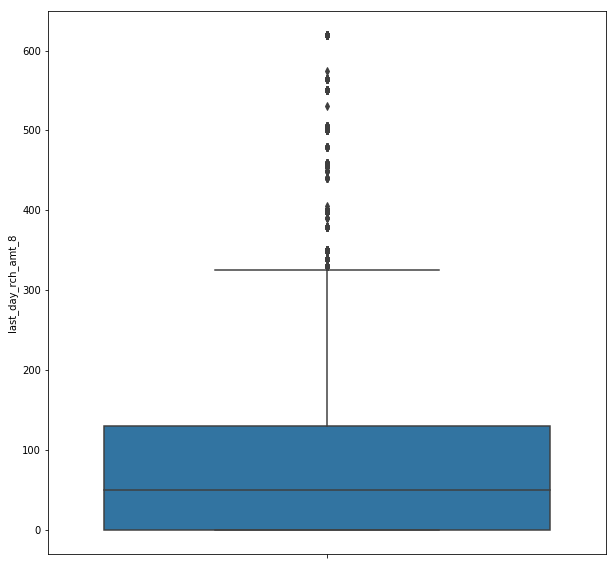

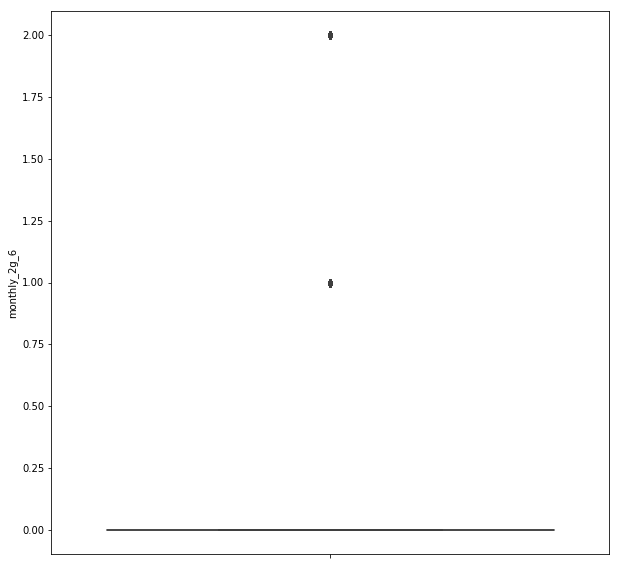

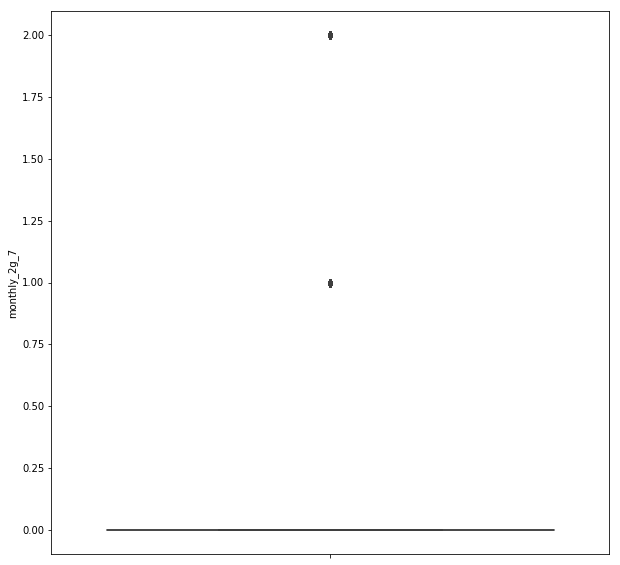

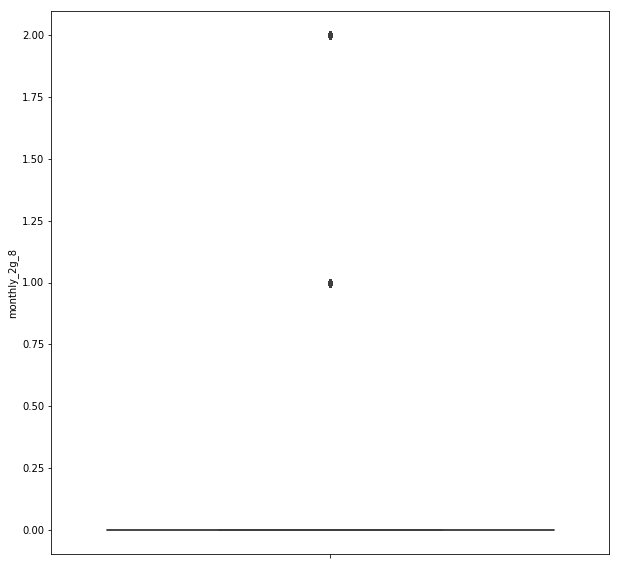

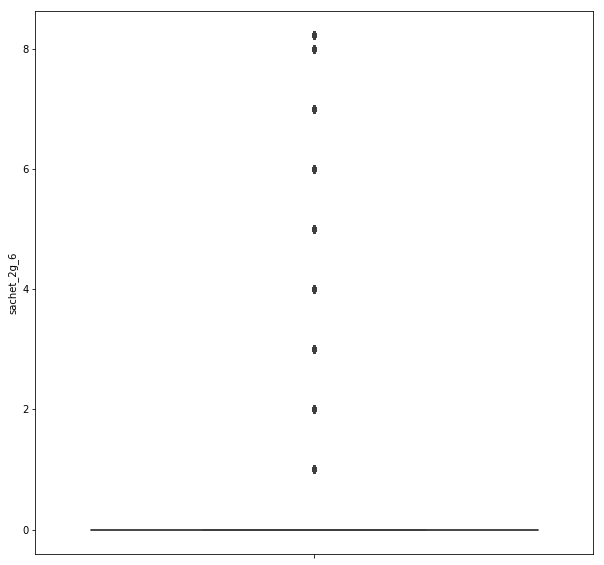

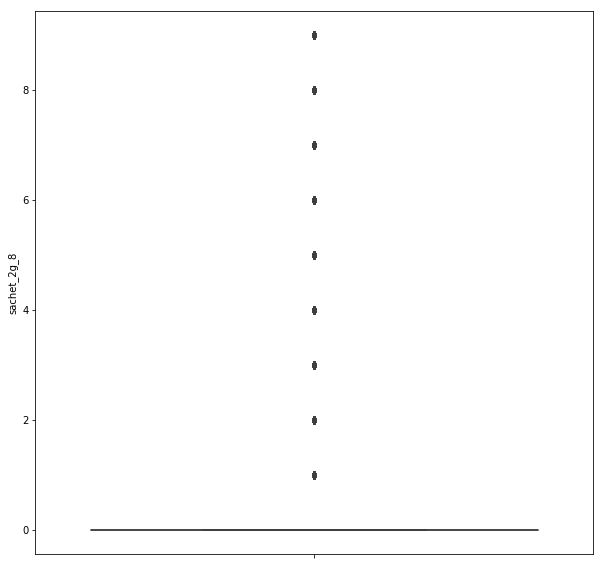

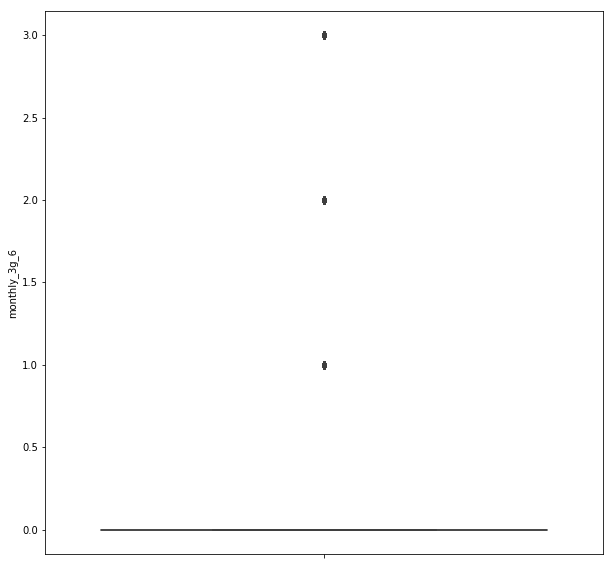

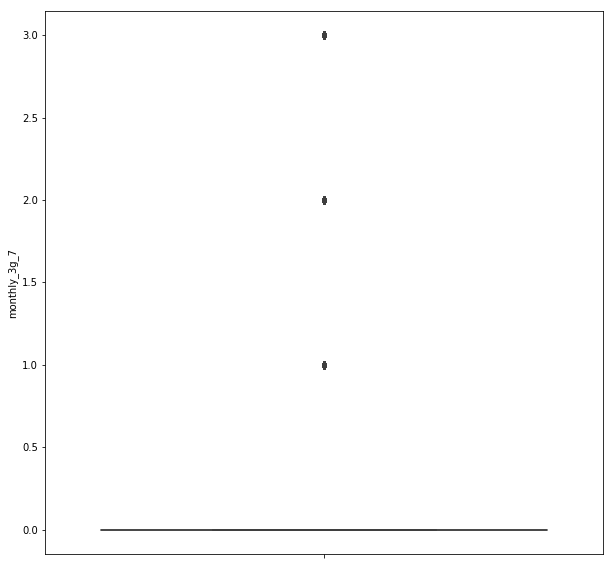

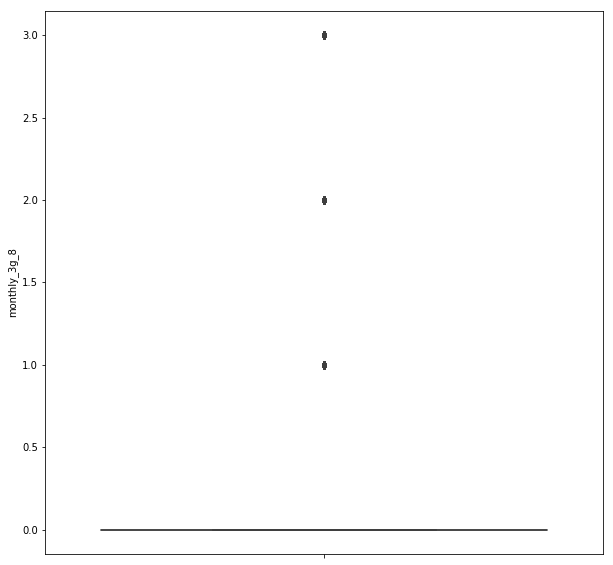

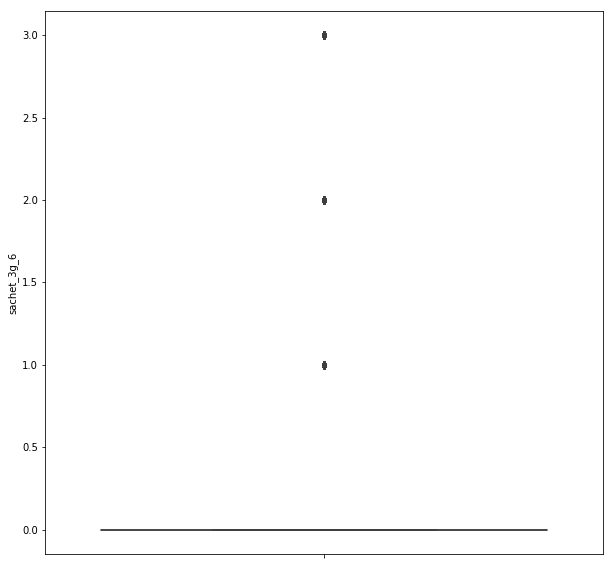

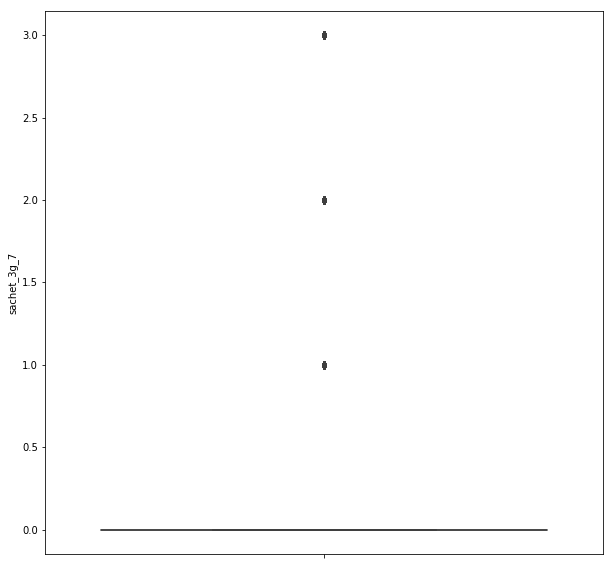

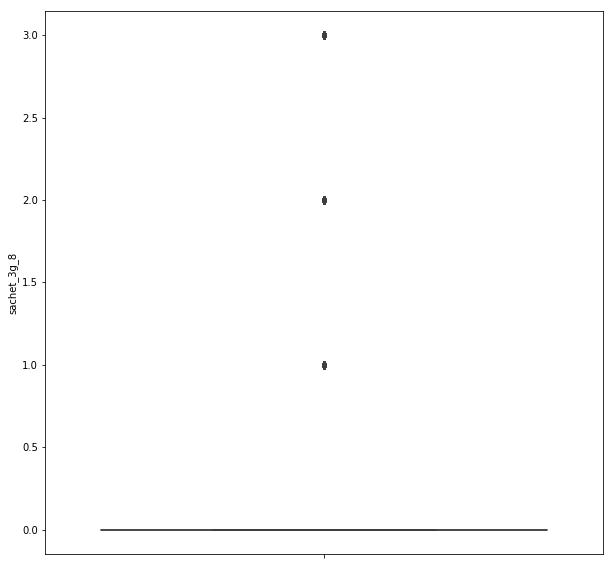

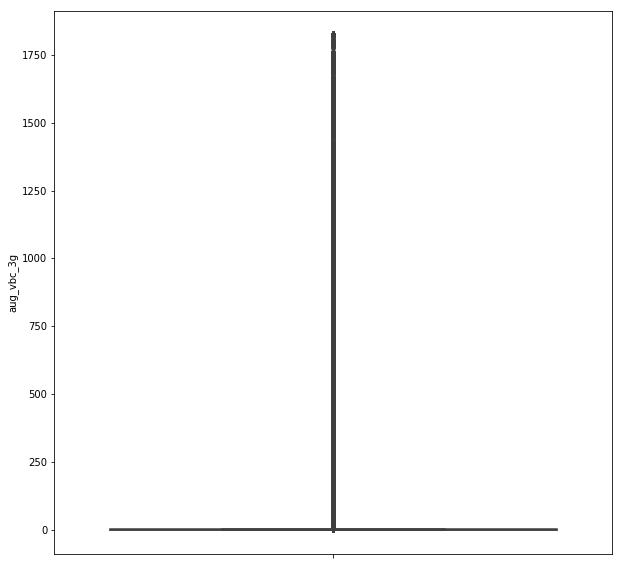

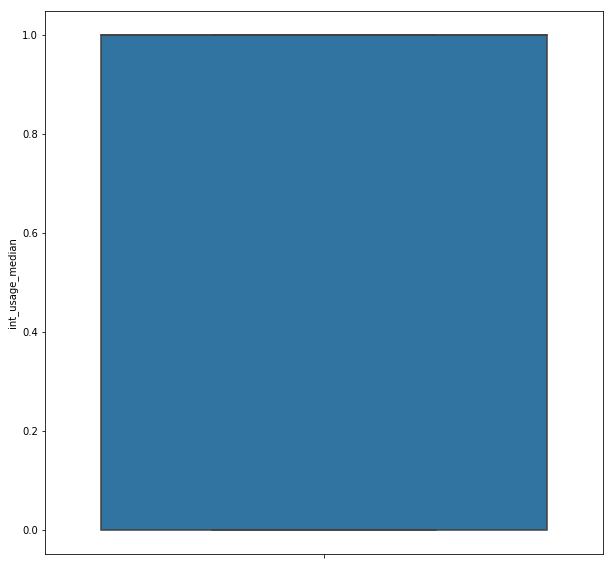

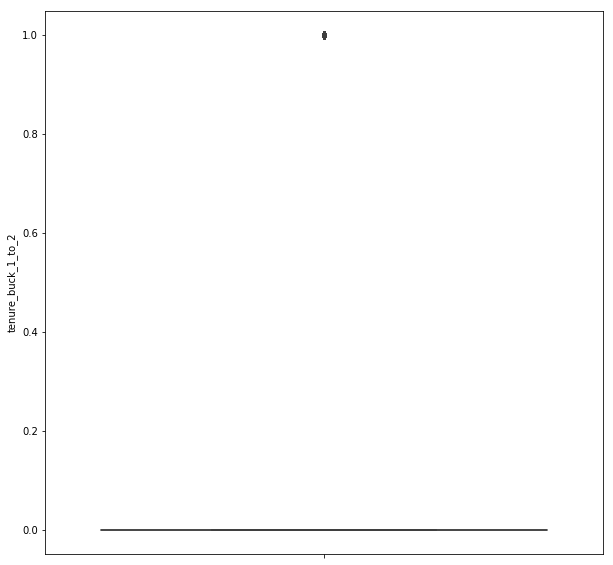

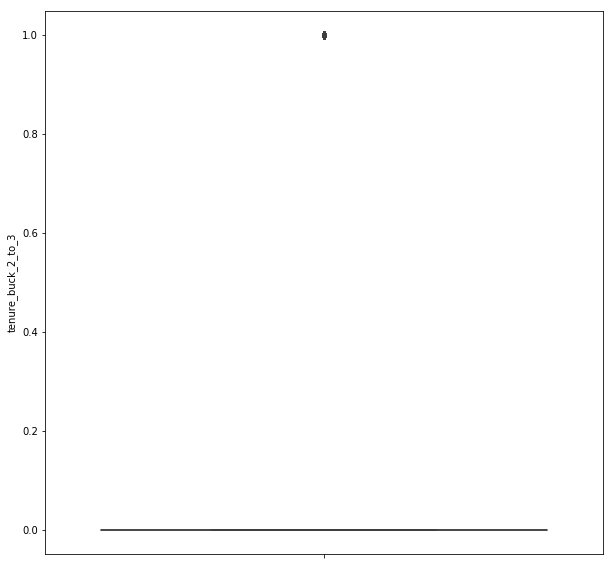

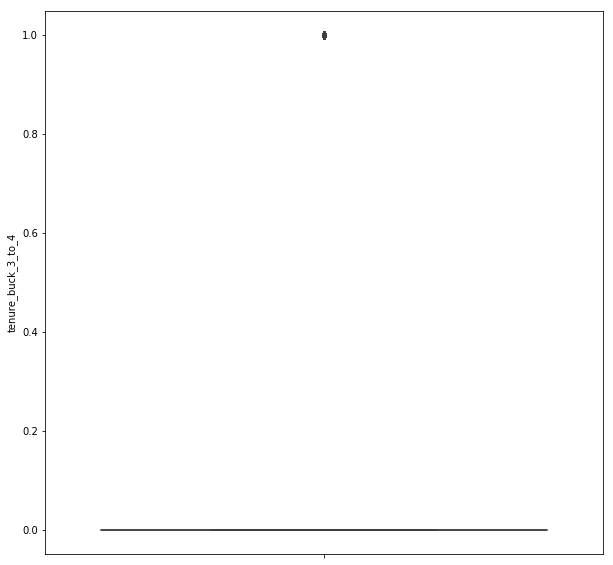

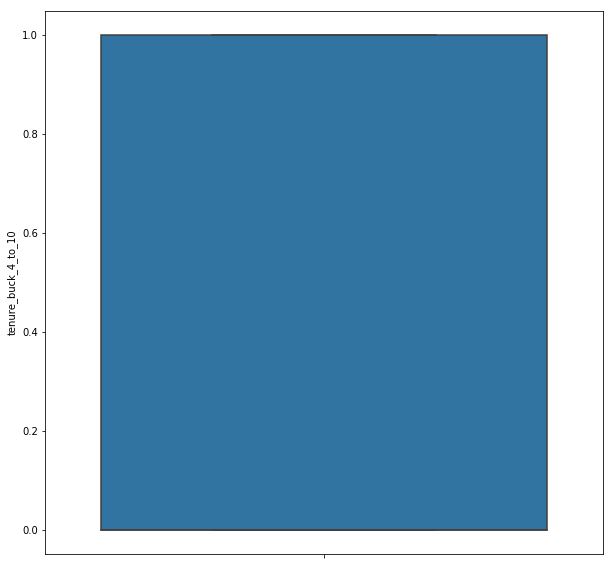

In [59]:
for col in cols:
    plt.figure(figsize=(10, 10))
    sns.boxplot(y=col, data=telco_df4)

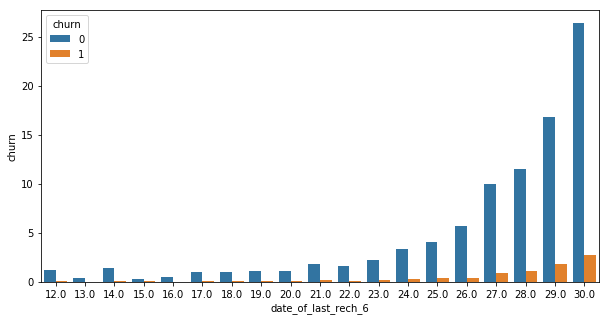

In [60]:
# Plotting for last recharge at 6 months and corresponding churn
plt.figure(figsize=(10,5))
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=telco_df4,estimator=lambda x: len(x) / len(telco_df4) * 100)

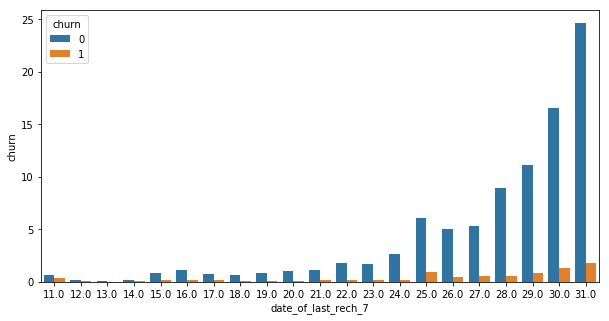

In [61]:
# Plotting for last recharge at 7 months and corresponding churn
plt.figure(figsize=(10,5))
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=telco_df4,
            estimator=lambda x: len(x) / len(telco_df4) * 100)

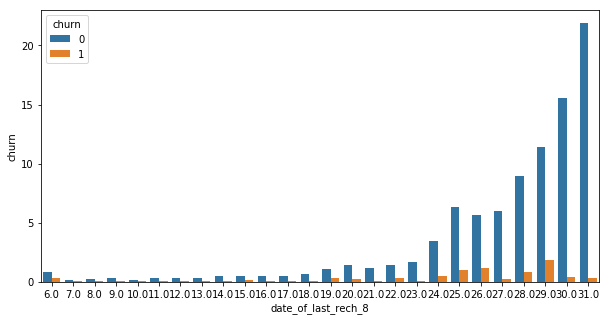

In [62]:
# Plotting for last recharge at 8 months and corresponding churn
plt.figure(figsize=(10,5))
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=telco_df4,
            estimator=lambda x: len(x) / len(telco_df4) * 100)

In [63]:
telco_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_good_phase
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373,325.238792
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353,370.833466
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000,115.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000,229.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000,419.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000,37762.500000


In [64]:
#Splitting data into Training and Test
telco_df5=telco_df4

In [65]:
X = telco_df5.drop(['churn','mobile_number'],axis=1)

In [66]:
y = telco_df5['churn']

In [67]:
## Normalization
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
X_norm = X.apply(normalize) 
X_norm.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_og_t2t_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,int_usage_median,tenure_buck_1_to_2,tenure_buck_2_to_3,tenure_buck_3_to_4,tenure_buck_4_to_10
7,0.534739,0.670877,1.000000,0.026693,0.194390,0.234889,0.046432,0.114358,0.109657,0.047732,...,0.0,0.0,0.0,0.0,0.031678,1.0,0.0,1.0,0.0,0.0
8,0.183426,0.236395,0.069093,0.190915,0.040222,0.033002,0.000000,0.000000,0.000000,0.275980,...,0.0,0.0,0.0,0.0,0.011538,0.0,0.0,0.0,0.0,0.0
13,0.241494,0.091225,0.298408,0.231559,0.177150,0.049040,0.067316,0.492536,0.249916,0.046097,...,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,1.0
16,0.210013,0.138947,0.094510,0.023310,0.126865,0.094876,0.000000,0.009664,0.000000,0.039577,...,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0
17,0.341812,0.000000,0.012826,0.547290,0.026033,0.000000,0.000000,0.016254,0.016670,0.036215,...,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.7,test_size=0.3,random_state=100)

In [69]:
X_train.shape

(20985, 64)

In [70]:
y_train.shape

(20985,)

In [71]:
X_test.shape

(8994, 64)

In [72]:
y_test.shape

(8994,)

In [73]:
#Count of Label 1 in train and test
sum(y_train==1)

1774

In [74]:
sum(y_test==1)

815

In [75]:
#Count of Label 0 in train and test
sum(y_test==0)

8179

In [76]:
sum(y_train==1)

1774

In [77]:
## Principal Component Analysis ##

In [78]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [79]:
print(pca.components_)

[[ 2.72369800e-02  3.06142023e-02  5.64744606e-02 ... -1.09460763e-01
  -3.84789123e-02  6.33592602e-01]
 [ 4.19577541e-02  6.06209493e-02  6.47183227e-02 ...  2.56798651e-02
   2.31063559e-02 -4.19414480e-01]
 [ 8.88625902e-03  9.56332595e-03  4.57221498e-03 ...  6.41656186e-01
   1.67820709e-01 -2.97173043e-01]
 ...
 [ 2.69722013e-01  3.88077501e-01 -2.98774943e-01 ... -4.22583790e-03
  -5.99640078e-03 -6.33513615e-03]
 [ 4.76366092e-02  2.09918152e-01 -5.49891390e-02 ...  3.83141678e-03
   8.60569034e-04  1.01377806e-04]
 [-5.87281796e-01  4.24521445e-01  1.24450891e-02 ... -8.18629035e-04
   3.28940982e-03  3.76003736e-03]]


In [80]:
colnam = list(X_train.columns)

In [81]:
pcadf = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],'Feature':colnam})

In [82]:
pcadf.shape

(64, 11)

In [83]:
pcadf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Feature
0,0.027237,0.041958,0.008886,-0.029580,0.334754,0.044592,-0.024739,-0.079073,-0.011122,-0.164485,arpu_6
1,0.030614,0.060621,0.009563,-0.025612,0.346956,0.045207,0.080251,-0.090181,0.177421,0.096112,arpu_7
2,0.056474,0.064718,0.004572,-0.014648,0.346921,0.048834,0.089048,-0.095657,0.200308,0.162758,arpu_8
3,-0.065342,-0.031827,0.015779,-0.060761,0.122063,0.018838,0.060376,-0.005685,0.031335,-0.107348,onnet_mou_6
4,-0.032607,-0.034910,0.001618,-0.042571,0.307146,0.029502,-0.161038,-0.063225,0.022611,-0.156416,offnet_mou_6


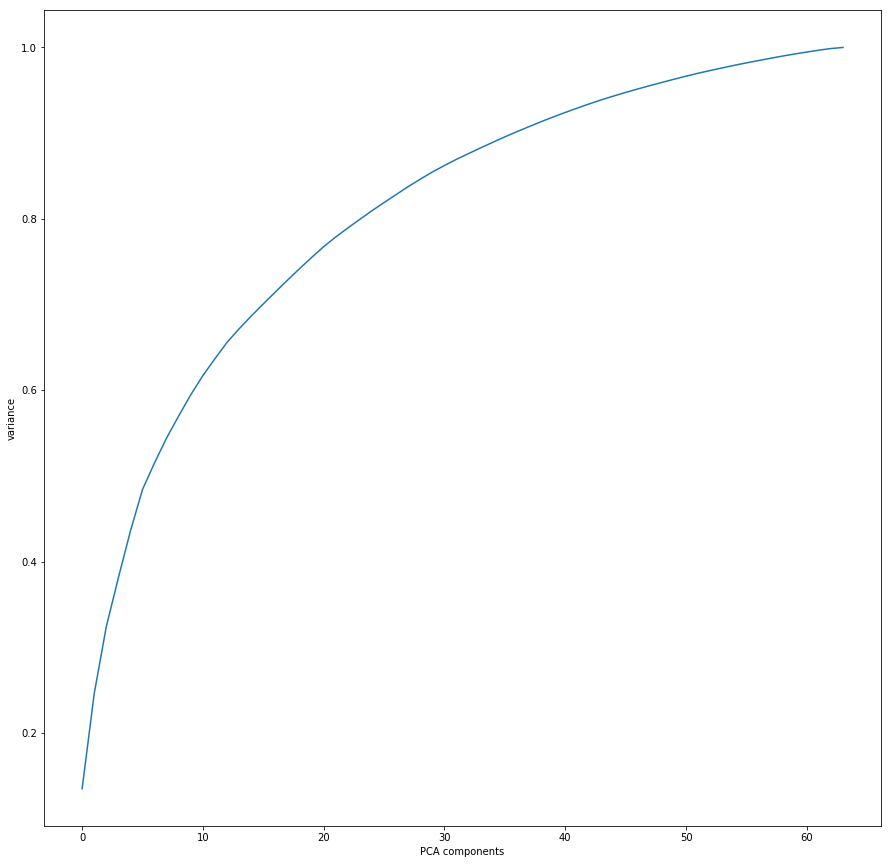

In [84]:
fig = plt.figure(figsize = (15,15))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('PCA components')
plt.ylabel('variance')
plt.show()

In [85]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)
#After 40 the curve is almost becoming horizontal and not much of a difference in the cumulative variance explained


In [86]:
pca_final

IncrementalPCA(batch_size=None, copy=True, n_components=40, whiten=False)

In [87]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20985, 40)

In [88]:
## Analysing correlation matrix
correl1 = np.corrcoef(df_train_pca.transpose())

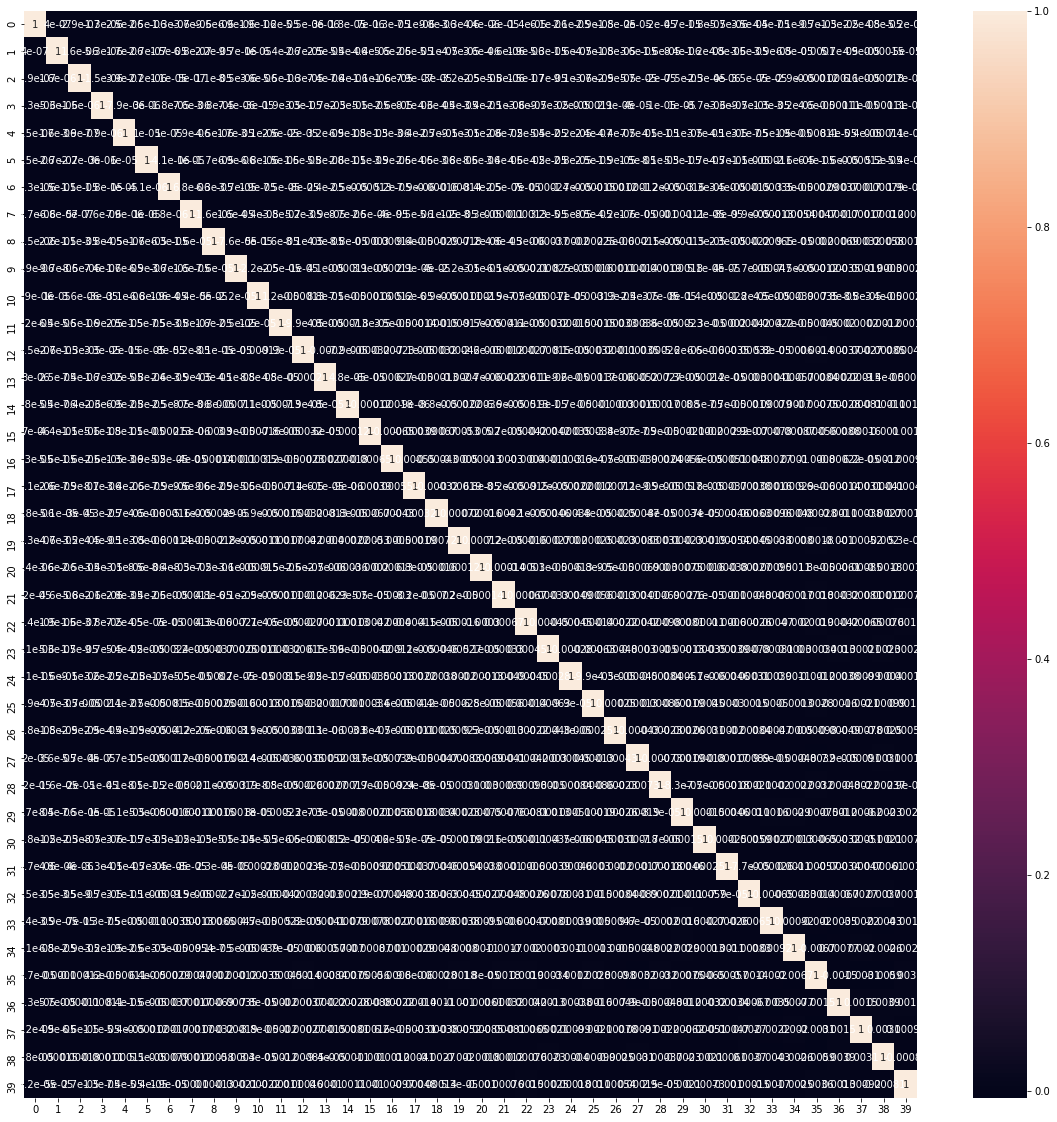

In [89]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,20))
sns.heatmap(correl1,annot = True)

In [90]:
#Finding maximum correlation
correl1_maxmin = correl1 - np.diagflat(correl1.diagonal())

In [91]:
correl1_maxmin.max()

0.003883109558231098

In [92]:
#Finding minimum correlation
correl1_maxmin.min()

-0.006666116621359143

In [93]:
testpca=pca_final.transform(X_test)

In [94]:
testpca.shape

(8994, 40)

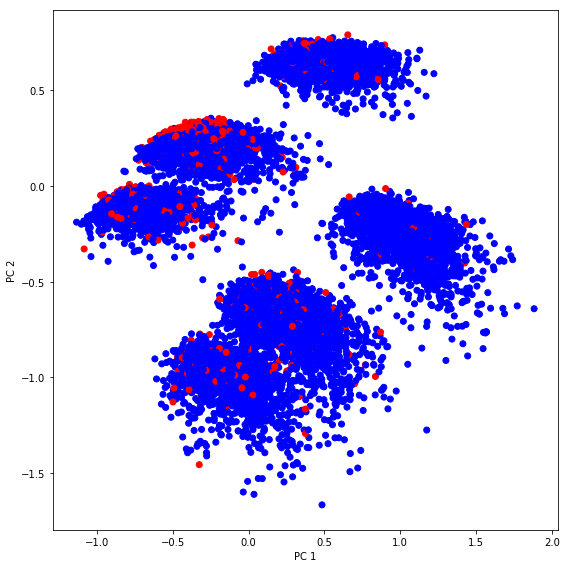

In [95]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'blue',1:'red'}))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()
plt.show()

Implementing Decision Trees on PCA

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')

In [98]:
default.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [99]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [100]:
# Making predictions
y_pred_default = default.predict(testpca)

In [101]:
#Evaluation parameter for the model

In [102]:

print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81      8179
           1       0.19      0.70      0.30       815

   micro avg       0.70      0.70      0.70      8994
   macro avg       0.57      0.70      0.55      8994
weighted avg       0.89      0.70      0.76      8994



In [103]:
# Accuracy of the model
accuracy_score(y_test,y_pred_default)

0.699466310873916

In [104]:
#Confusion Matrix
print(confusion_matrix(y_test,y_pred_default))

[[5722 2457]
 [ 246  569]]


In [105]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

In [106]:
#Finding Specificity
TN / float(TN+FP)

0.699596527692872

In [107]:
#Finding Senstivity
TP / float(TP+FN)

0.698159509202454

In [108]:
# Finding Negative predictive value
TN / float(TN+ FN)

0.9587801608579088

In [109]:
# Finding Positive predictive value
TP / float(TP+FP)

0.18803701255783212

In [110]:
#Misclassification Rate
(FN+FP)/(TP+TN+FP+FN)

0.3005336891260841

In [111]:
#Hyperparamter tuning for Decision tree
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [112]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

In [113]:
#Creating model instance
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

In [114]:
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy")
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [115]:
y_train.shape

(20985,)

In [116]:
y_train.describe

<bound method NDFrame.describe of 88105    0
34588    0
16623    0
54904    0
33555    0
25467    0
44097    0
81316    0
20754    0
4688     0
83409    0
43627    0
40496    0
34252    0
31744    0
79403    0
93140    0
87528    0
8466     0
76424    0
23565    0
19391    0
7424     1
2784     0
3283     0
88564    0
17130    0
95244    1
88386    1
9297     1
        ..
19114    0
62948    0
20638    1
51614    0
19059    0
32344    0
37115    0
25646    0
59253    0
88483    1
38218    0
87744    0
69457    0
36593    0
44292    0
57376    0
18658    0
26232    0
46324    0
68674    0
33541    0
47593    1
55833    0
54441    0
281      0
40270    0
81475    0
47213    0
77813    0
18642    0
Name: churn, Length: 20985, dtype: int32>

In [117]:
# scores of GridSearch CV
scores = tree.cv_results_


In [118]:
pd.DataFrame(scores).head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.144008,0.000632,0.0020,1.507891e-07,1,{'max_depth': 1},0.629586,0.553252,0.478914,0.520610,...,0.550536,0.050346,39,0.618633,0.548308,0.485108,0.535978,0.571565,0.551919,0.043744
1,0.265415,0.003826,0.0020,9.536743e-08,2,{'max_depth': 2},0.808004,0.731475,0.747677,0.757922,...,0.766023,0.027276,33,0.811223,0.738444,0.739516,0.766798,0.782238,0.767644,0.027410
2,0.377822,0.000400,0.0020,9.536743e-08,3,{'max_depth': 3},0.711768,0.655468,0.660234,0.676674,...,0.681344,0.022421,38,0.720379,0.670598,0.664880,0.692816,0.704628,0.690660,0.020737
3,0.488628,0.000800,0.0020,0.000000e+00,4,{'max_depth': 4},0.697237,0.763164,0.738146,0.725280,...,0.730522,0.021271,35,0.713469,0.777937,0.754348,0.747498,0.734052,0.745461,0.021408
4,0.593634,0.000490,0.0020,9.536743e-08,5,{'max_depth': 5},0.738685,0.711699,0.707887,0.731713,...,0.715035,0.018927,37,0.760410,0.730462,0.735704,0.755897,0.694502,0.735395,0.023421
5,0.694040,0.001673,0.0020,9.536743e-08,6,{'max_depth': 6},0.746070,0.726710,0.712890,0.723612,...,0.727663,0.010736,36,0.776970,0.754408,0.734394,0.745533,0.750074,0.752276,0.014032
6,0.794645,0.013216,0.0024,4.898041e-04,7,{'max_depth': 7},0.724631,0.721229,0.738146,0.731713,...,0.733286,0.010489,34,0.770298,0.755421,0.769776,0.770789,0.777354,0.768728,0.007202
7,0.877650,0.019191,0.0024,4.900182e-04,8,{'max_depth': 8},0.756074,0.769359,0.782702,0.761735,...,0.768168,0.009035,32,0.815274,0.811056,0.825232,0.805278,0.814641,0.814296,0.006519
8,0.936854,0.004535,0.0026,4.899209e-04,9,{'max_depth': 9},0.781324,0.773886,0.799381,0.788182,...,0.787801,0.009391,31,0.850301,0.826900,0.848046,0.838575,0.847400,0.842244,0.008649
9,0.988456,0.011535,0.0024,4.899014e-04,10,{'max_depth': 10},0.782754,0.795330,0.801287,0.796998,...,0.796569,0.007914,30,0.864061,0.848046,0.872111,0.862044,0.869141,0.863081,0.008323


Text(0, 0.5, 'Accuracy')

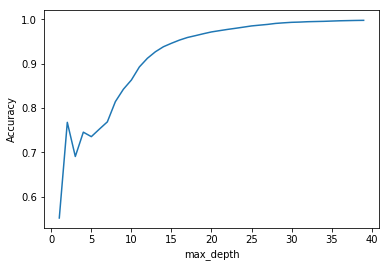

In [119]:
##Plot for accuracy and max_depth parameter
plt.plot(scores["param_max_depth"],scores["mean_train_score"],label="training accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

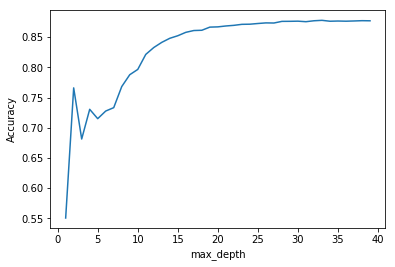

In [120]:
plt.plot(scores["param_max_depth"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")

In [121]:
## Tuning Sample leaf paramater
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy")
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [122]:
#Publishing Scores
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.115664,0.032354,0.0022,0.00040,5,{'min_samples_leaf': 5},0.833969,0.843460,0.836550,0.841792,...,0.840982,0.005333,1,0.937511,0.937813,0.936443,0.935251,0.942045,0.937813,0.002300
1,0.958855,0.022694,0.0022,0.00040,25,{'min_samples_leaf': 25},0.758218,0.771742,0.769836,0.774839,...,0.770360,0.006573,2,0.826354,0.815285,0.819276,0.825828,0.824409,0.822230,0.004282
2,0.904252,0.014946,0.0022,0.00040,45,{'min_samples_leaf': 45},0.714626,0.722897,0.736002,0.726710,...,0.725661,0.006976,10,0.774468,0.773469,0.781868,0.765666,0.767050,0.772504,0.005813
3,0.857849,0.011197,0.0026,0.00049,65,{'min_samples_leaf': 65},0.721296,0.725280,0.749583,0.727424,...,0.730951,0.009849,6,0.771073,0.764772,0.780855,0.762866,0.761451,0.768204,0.007130
4,0.832648,0.011638,0.0024,0.00049,85,{'min_samples_leaf': 85},0.720343,0.730045,0.739099,0.736717,...,0.730569,0.006795,7,0.764758,0.764653,0.769002,0.763224,0.756567,0.763641,0.004031


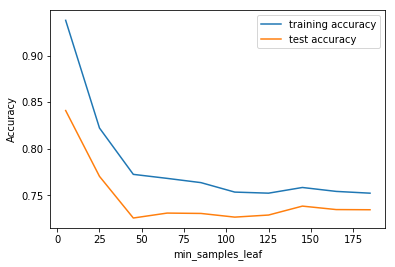

In [123]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [124]:
# tuning min_samples_split
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [125]:
#Publishing scores
scores = tree.cv_results_
pd.DataFrame(scores).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.227270,0.046943,0.0022,0.00040,5,{'min_samples_split': 5},0.870891,0.872766,0.872290,0.872766,...,0.873147,0.002057,1,0.994520,0.995175,0.995235,0.993209,0.994520,0.994532,0.000729
1,1.212269,0.014594,0.0026,0.00049,25,{'min_samples_split': 25},0.826346,0.836550,0.827496,0.832976,...,0.832738,0.005300,2,0.930720,0.931260,0.925482,0.937157,0.924236,0.929771,0.004620
2,1.158266,0.026740,0.0022,0.00040,45,{'min_samples_split': 45},0.784421,0.803669,0.801763,0.799619,...,0.798809,0.007393,3,0.873652,0.884382,0.883131,0.885513,0.876943,0.880724,0.004613
3,1.129665,0.029236,0.0024,0.00049,65,{'min_samples_split': 65},0.756789,0.776745,0.787229,0.770312,...,0.774363,0.010366,4,0.837612,0.845187,0.857279,0.845664,0.845375,0.846223,0.006301
4,1.105863,0.027090,0.0022,0.00040,85,{'min_samples_split': 85},0.737494,0.759114,0.771503,0.757684,...,0.756254,0.010912,5,0.816108,0.823028,0.836014,0.822016,0.812258,0.821885,0.008087


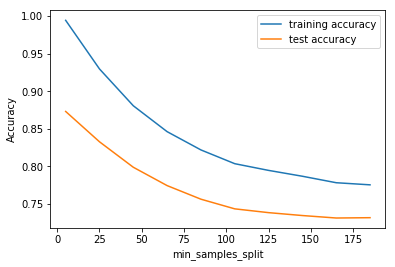

In [126]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [127]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 14.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(5, 200, 20), 'min_samples_split': range(5, 200, 20), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit='recall_score',
       return_train_score='warn', scoring=None, verbose=1)

In [128]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.168324,0.137288,0.0036,4.899403e-04,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.758456,...,0.730141,0.030374,135,0.776077,0.709793,0.781094,0.758935,0.692894,0.743758,0.035804
1,1.906709,0.007003,0.0030,9.536743e-08,entropy,5,5,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.758456,...,0.730093,0.030434,137,0.776077,0.709793,0.781094,0.758935,0.692894,0.743758,0.035804
2,1.921710,0.030685,0.0030,6.324851e-04,entropy,5,5,45,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.758456,...,0.730093,0.030434,137,0.776077,0.709793,0.781094,0.758935,0.692894,0.743758,0.035804
3,1.909509,0.004674,0.0034,4.898625e-04,entropy,5,5,65,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.758456,...,0.730141,0.030374,135,0.776077,0.709793,0.781094,0.758935,0.692894,0.743758,0.035804
4,1.918710,0.023080,0.0028,7.483027e-04,entropy,5,5,85,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.756789,...,0.729759,0.030129,147,0.775124,0.709793,0.781094,0.758935,0.692894,0.743568,0.035633


In [129]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7868477483917083
DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [130]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100,
                                  max_depth=10,min_samples_leaf=5,min_samples_split=5)
clf_gini.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [131]:
y_pred_default = clf_gini.predict(testpca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[6619, 1560],
       [ 341,  474]], dtype=int64)

In [132]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

In [133]:
# Analysing Specificity
TN / float(TN+FP)

0.8092676366303949

In [134]:
# Analysing Senstivity
TP / float(TP+FN)

0.5815950920245399

In [135]:
#Analyse rate of false positive
FP/ float(TN+FP)

0.19073236336960508

In [136]:
#Negative predictive value
TN / float(TN+ FN)

0.9510057471264368

In [137]:
#False Predictive value
TP / float(TP+FP)

0.23303834808259588

In [138]:
# Misclassification Rate
(FN+FP)/(TP+TN+FP+FN)

0.21136313097620635

Implement Random Forest on PCA

In [139]:

from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')


In [140]:
# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(testpca)

In [141]:
#Analysing confusion matrix
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[8130,   49],
       [ 740,   75]], dtype=int64)

In [142]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

In [143]:
# Analysing Specificity
TN / float(TN+FP)

0.9940090475608265

In [144]:
# Analysing Senstivity
TP / float(TP+FN)

0.09202453987730061

In [145]:
#Analyse rate of false positive
FP/ float(TN+FP)

0.0059909524391734935

In [146]:
#Negative predictive value
TN / float(TN+ FN)

0.9165727170236753

In [147]:
#False Predictive value
TP / float(TP+FP)

0.6048387096774194

In [148]:
# Misclassification Rate
(FN+FP)/(TP+TN+FP+FN)

0.0877251501000667

In [149]:
#Tuning Hyperparameter of Random Forest

In [150]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf_with_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [151]:
#Publish scores
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.526830,0.038454,0.020201,0.010629,2,{'max_depth': 2},0.751548,0.730522,0.746247,0.751966,...,0.745675,0.007872,4,0.757967,0.745413,0.743865,0.758935,0.747632,0.750763,0.006398
1,1.314675,0.039477,0.013801,0.001166,7,{'max_depth': 7},0.862554,0.854896,0.855849,0.859423,...,0.859328,0.003556,3,0.892476,0.881939,0.883429,0.888194,0.890404,0.887289,0.004024
2,1.706698,0.018619,0.016201,0.000400,12,{'max_depth': 12},0.905193,0.907553,0.914224,0.910174,...,0.908744,0.003188,2,0.965628,0.968668,0.965809,0.962175,0.962535,0.964963,0.002390
3,1.673896,0.155728,0.014601,0.002154,17,{'max_depth': 17},0.913292,0.914224,0.918275,0.918513,...,0.915940,0.002113,1,0.982725,0.983202,0.980105,0.981058,0.982131,0.981844,0.001127


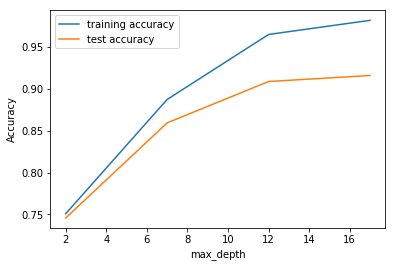

In [152]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Value seems to be around 10

In [153]:
# Tuning n_estimators

In [154]:
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [155]:
#Publish the scores
scores = rf.cv_results_
pd.DataFrame(scores).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,15.457884,0.128923,0.135208,0.006794,100,{'n_estimators': 100},0.897570,0.906123,0.913510,0.907791,...,0.907219,0.005465,4,0.959671,0.958601,0.958363,0.956636,0.958663,0.958387,0.000984
1,77.470631,1.014646,0.649237,0.031462,500,{'n_estimators': 500},0.901382,0.908268,0.914939,0.911127,...,0.909793,0.004760,3,0.962054,0.959376,0.961044,0.957946,0.960808,0.960245,0.001433
2,138.329912,0.664413,1.110664,0.023713,900,{'n_estimators': 900},0.901143,0.908744,0.914701,0.911604,...,0.910031,0.004908,2,0.961875,0.959793,0.961341,0.957708,0.960986,0.960341,0.001484
3,181.680792,21.338655,1.348477,0.197329,1300,{'n_estimators': 1300},0.900429,0.907791,0.916369,0.912557,...,0.910317,0.005707,1,0.960624,0.960686,0.961341,0.957767,0.961344,0.960353,0.001329


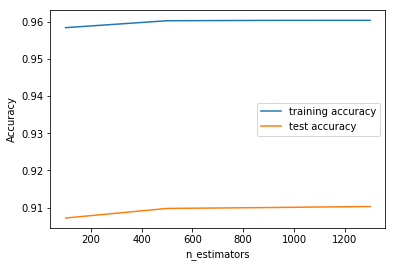

In [156]:
# plotting on accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

n_estimator at around 300

In [157]:
# Tuning max_features
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [158]:
#Publish the scores
scores = rf.cv_results_
pd.DataFrame(scores).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.255472,0.213647,0.016001,0.000632,4,{'max_features': 4},0.883040,0.897069,0.903026,0.897546,...,0.895116,0.006606,5,0.940609,0.941804,0.944186,0.939361,0.947287,0.942649,0.002813
1,2.105520,0.035944,0.015001,0.000632,8,{'max_features': 8},0.891377,0.893734,0.903979,0.895163,...,0.897260,0.004889,2,0.944898,0.944842,0.947165,0.940612,0.945202,0.944544,0.002143
2,3.451998,0.017692,0.014601,0.000490,14,{'max_features': 14},0.889471,0.892542,0.900167,0.896831,...,0.895211,0.003758,4,0.950557,0.949249,0.947165,0.946152,0.948776,0.948380,0.001555
3,5.224699,0.253406,0.014801,0.000400,20,{'max_features': 20},0.892806,0.899214,0.899929,0.898499,...,0.899023,0.003786,1,0.950319,0.952406,0.944722,0.943888,0.949848,0.948237,0.003334
4,5.209298,0.622291,0.013001,0.001673,24,{'max_features': 24},0.894235,0.889207,0.903503,0.895163,...,0.896831,0.005280,3,0.948591,0.949547,0.945675,0.942816,0.947704,0.946867,0.002395


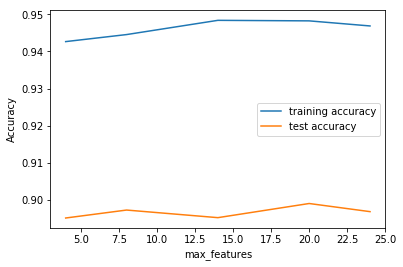

In [159]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Value seems to be around 8

In [160]:
# tuning min_samples_leaf
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [161]:
# publishing scores
scores = rf.cv_results_
pd.DataFrame(scores).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.381079,0.174908,0.017801,0.006646,100,{'min_samples_leaf': 100},0.838971,0.828211,0.829878,0.840362,...,0.836026,0.005848,1,0.860011,0.856088,0.852097,0.852275,0.855560,0.855206,0.002907
1,1.205469,0.040680,0.014601,0.001356,150,{'min_samples_leaf': 150},0.831110,0.821539,0.816059,0.817965,...,0.823541,0.006394,2,0.846012,0.834942,0.833750,0.833214,0.839359,0.837455,0.004793
2,1.086262,0.027412,0.013801,0.001721,200,{'min_samples_leaf': 200},0.811101,0.820586,0.821539,0.821301,...,0.817346,0.004673,3,0.829987,0.831249,0.825471,0.829402,0.817380,0.826698,0.005043
3,1.036659,0.011325,0.013401,0.001020,250,{'min_samples_leaf': 250},0.798714,0.800334,0.797474,0.797951,...,0.799952,0.002840,5,0.810806,0.812485,0.809566,0.800870,0.813807,0.809507,0.004553
4,0.985656,0.017818,0.013601,0.001020,300,{'min_samples_leaf': 300},0.795855,0.812962,0.804861,0.809388,...,0.805194,0.005839,4,0.803598,0.818084,0.808375,0.809924,0.802966,0.808589,0.005450


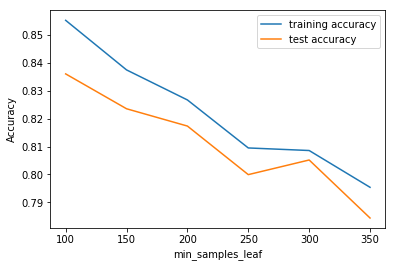

In [162]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Value seems to be 100

In [163]:
# tuning min_samples_split parameter
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [164]:
#publishing scores
scores = rf.cv_results_
pd.DataFrame(scores).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.972256,0.044380,0.010801,4.000425e-04,200,{'min_samples_split': 200},0.852311,0.850608,0.852514,0.858947,...,0.856612,0.006671,1,0.884673,0.881880,0.878187,0.878902,0.885222,0.881773,0.002878
1,0.898251,0.009868,0.010201,4.000902e-04,250,{'min_samples_split': 250},0.848737,0.843460,0.839886,0.852990,...,0.848701,0.006608,2,0.869721,0.869192,0.864308,0.863712,0.884448,0.870276,0.007497
2,0.867050,0.006197,0.010001,1.168008e-07,300,{'min_samples_split': 300},0.833254,0.830832,0.844174,0.830832,...,0.835597,0.005203,3,0.862334,0.855611,0.860972,0.851442,0.857943,0.857660,0.003893
3,0.848049,0.007239,0.010200,4.000902e-04,350,{'min_samples_split': 350},0.831825,0.830593,0.828925,0.835835,...,0.833357,0.003869,4,0.856854,0.847451,0.841256,0.850965,0.854905,0.850286,0.005559
4,0.837848,0.007627,0.010001,1.168008e-07,400,{'min_samples_split': 400},0.816579,0.830832,0.825351,0.837026,...,0.829878,0.008295,5,0.837612,0.851442,0.846021,0.852156,0.849723,0.847391,0.005330


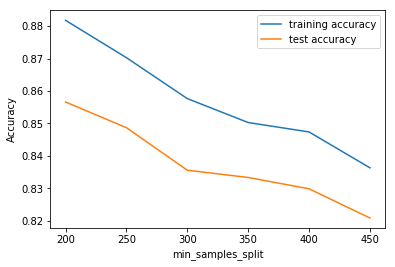

In [165]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Value seems to be from 200-250

In [166]:
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [167]:
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 23.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [8, 10], 'min_samples_leaf': range(100, 200, 100), 'min_samples_split': range(200, 400, 100), 'n_estimators': range(200, 400, 100), 'max_features': [8, 10, 12]},
       pre_dispatch='2*n_jobs', refit='recall_score',
       return_train_score='warn', scoring=None, verbose=1)

In [168]:
# Optimal accuracy score and hyperparameters
grid_search.best_score_

0.856325947105075

In [169]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 300}

In [170]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=300)

In [171]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features=8,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [172]:
# predict
y_pred_default = rfc.predict(testpca)

In [173]:
print(classification_report(y_test,y_pred_default))


              precision    recall  f1-score   support

           0       0.96      0.88      0.92      8179
           1       0.35      0.67      0.46       815

   micro avg       0.86      0.86      0.86      8994
   macro avg       0.66      0.77      0.69      8994
weighted avg       0.91      0.86      0.88      8994



In [174]:
print(accuracy_score(y_test,y_pred_default))

0.8570157883033134


In [175]:
print(confusion_matrix(y_test,y_pred_default))

[[7159 1020]
 [ 266  549]]


In [176]:
#analysing confusion matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[7159, 1020],
       [ 266,  549]], dtype=int64)

In [177]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

In [178]:
print(accuracy_score(y_test,y_pred_default))

0.8570157883033134


In [179]:
#Senstivity
TN / float(TN+FP)

0.8752903777967966

In [180]:
#Specificity
TP / float(TP+FN)

0.6736196319018405

In [181]:
#False positive rate
FP/ float(TN+FP)

0.12470962220320332

In [182]:
#Negative pred value
TN / float(TN+ FN)

0.9641750841750841

In [183]:
#Positive pred value
TP / float(TP+FP)

0.34990439770554493

In [184]:
#Misclassification rate
(FN+FP)/(TP+TN+FP+FN)

0.14298421169668668

Accuracy of Random Forest is 86% whereas for Decision tree it is 78%

Senstivity for Random Forest is 87% and for Decision Tree it is 58%

Therefore Random forest is a better fit in this case

Inferences and suggestions:
    1.Most of the users are churned by 8th month.
    2.The trend for the user churn starts from 6th month and goes on till 8th month
    3.Need to target and handle customers for whom std incoming calls decreased in that month
    4.Similarly company to focus and monitor customers for whom the incoming amount when on roaming , has increased
    5.Also, if the recharge amount is small, there are high chances that customer may churn.
    6.If customer does not recharge also it is a threat i.e. it may churn, and might be looking out for another telco carrier
    7.So a typical solution can be to check the mean amount of recharge done byhte customer
      . If the amount decreases then the customer is at the risk of churning.
    8.Most of the users seems to be churninin the last week of the month. It would be therefor suggested
      to float some custom offers to those customers. Or introduced an incentive linked plan that activates
       during that last week only
    
    
    

Important variables to be looked after are:
    roam_ic_mou_8,std_ic_t2f_mou_8,last_day_rch_amt_8,date_of_last_rech_8,ARPU 7th and 8th,max_rech_amt_8